# COSC 3P99 Computer Science Project: Graph Neural Networks

Name: Elias Switzer

Student #: 7419997

Notebook 1

## Graphs, Features, and Classification

### What is a Graph?

A graph, $G=(V,E)$, is defined by a set of nodes $V$ and a set of edges  $E$ that connect those nodes.

Graphs are often represented through *adjacency matrices*, which order every node index in a particular row and column. Edges are represented as entries in the matrix, where $A[u,v]=1$ if the edge is present, and $A[u,v]=0$ if the edge is not.

Example adjacency matrix:

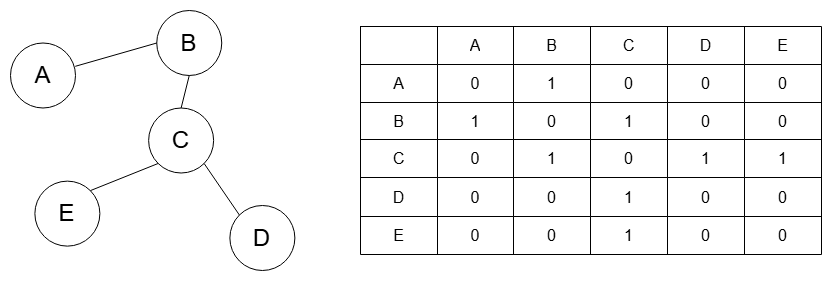

Graphs can also be *directed*, where the adjacency matrix might not be symmetrical, and they can be *weighted*, where entries in the matrix are arbitrary real values instead of 0 and 1.

### Feature Information

Sometimes we might have *feature* information associated with a graph. Most often, these features are node-level attributes that we can represent as a *feature matrix*, $X\inℝ^{|V|\times m}$, where $m$ is the number of features. We also need to assume that the ordering of the nodes in the feature matrix is consistent with the ordering in the adjacency matrix.

Example feature matrix for the above graph:

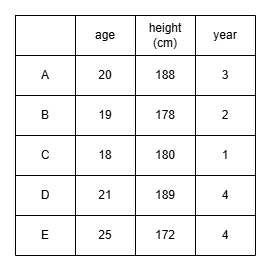

### Node Classification

The goal of *node classification* is to predict the label associated with all the nodes in a graph, given only the true labels of the training set of nodes.

### Supervised or Semi-supervised?

Supervised learning pertains to classification problems, where we train a model on training data and evaluate its level of prediction using the testing data. Semi-supervised learning is a problem specifically involving graphs, in that nodes in a graph aren't independent and identically distributed (like the pixels in an image for example), but are connected to each other. We don't split the graph into a training subgraph and a testing subgraph, but rather preserve the full structure of the graph and simply mark nodes as training or testing nodes.

Supervised and semi-supervised are also known as inductive and transductive supervised learning.

## Why Study Data on Graphs?

There are many good reasons to study data on graphs. For one, there are many structures that inherrently have graph structure such as molecules, the connective structure of the brain, transportation networks, social networks, and more. Furthermore, the processes driving our reasoning and decision-making are, in some sense, graph-structured, and thus it would be difficult to build an "intelligent" system without relying on graph data.

## Node Embeddings

A *node embedding* is a low-dimensional vector representation of a given node that summarizes its position in a graph and the structure of its local graph neighborhood.

Using an encoder, we can translate each node to a node embedding in the *embedding space* for a given graph. We can also use a decoder to reconstruct certain information about a node from its embedding.

## The GNN and Neural Message Passing

### Permutation Invariance and Equivariance

Having a model that is *permutation invariant* means that the model does not depend on the arbitrary ordering of the nodes in the graph's adjacency matrix.

A model that is *permutation equivariant* means that its output is permuted in a consistent way when we permute the adjancency matrix.

For any function $f$ that takes an adjacency matrix $A$, and a permutation matrix $P$, the following is true:
- $f(PAP^{T})=f(A)$ - Permutation Invariance
- $f(PAP^{T})=Pf(A)$ - Permutation Equivariance

It is important to design models that are either permutation invariant or equivariant.

### Neural Message Passing

The basic GNN uses a *neural message passing* algorithm, in which messages are exchanged between nodes and nodes are updated using these messages using neural networks.

During each message-passing iteration, a *hidden embedding* $h_u^{(k)}$ corresponding to each node in the graph is updated according to information aggregated from $u$'s graph neighbourhood.

The figure below demonstrates how a specific node aggregates messages from its neighbours, and in turn, the incoming messages are aggregates from their respective neighbours.

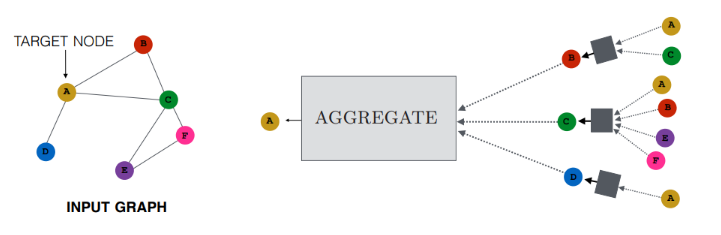

### Intuition Behind the GNN

The basic intuition behind the GNN, or *graph neural network* framework is that at each iteration, every node aggregates information from its local neighbourhood.

If $k$ is the number of iterations (or layers), at $k=1$ each node has information from its 1-hop neighbourhood, at $k=2$ each node has information from its 2-hop neighbourhood, and so on. It is for this reason that we don't want too many iterations, because the model becomes ineffective if every node is a complete aggregate of every other node in the graph.

### The Basic GNN Layer

The basic GNN message passing is defined as:

$$h_{u}^{(k)}=σ(W_{\text{self}}^{(k)}h_{u}^{(k-1)}+W_{\text{neigh}}^{(k)} ∑\limits_{v\in N(u)} h_{v}^{(k-1)}+b^{(k)})$$

Where $W_{\text{self}}^{(k)}$ and $W_{\text{neigh}}^{(k)}$ are the trainable weights of the current node and the its neighbours, $b^{(k)}$ is the biases of each node, $k$ denotes the current iteration (layer), and $N$ is the local neighbourhood of nodes for the current node. $σ$ simply denotes that we are adding non-linearity.

### Label Propagation and GCNs

*Label propagation* is where labels are assigned to unclassified nodes based on connections of classified nodes. For example, in fraud classification, known fraud nodes send fraud signals along their connections, and known good account nodes send good signals along their connections. Any given node collects all of the signals it is receiving, and aggregates them to update its own state. This is repeated over and over until the whole system stabilizes.

![label propagation example 1](https://miro.medium.com/v2/resize:fit:552/1*NRU6O9PbrK1ZvYJKp3bkzg.png)

![label propagation example 2](https://antonsruberts.github.io/assets/images/label_propagation/label_propagation.gif)

*Graph convolutional networks* are a specific arcitechture of GNNs (where message passing is another similar architecture). They can be understood as a simple message passing algorithm, but where label propagation does this just for known label values, GCNs do this for an entire vector of input data as well.

A simple calculation in a GCN layer:
1. For any node in the graph, get all of the attribute vectors of its connected nodes and apply some aggregation function, like an average. Aggregation insures that the representation is the same size regardless of the number of neighbours.
2. Pass this average through a dense neural network layer. In other words, multiply it by some matrix and apply an activation function (ReLU, softmax, etc.). The output of the dense layer is the new vector representation of the node.

## GCN Simple Node Classification Implementations

The following are node classification implementations.

The datasets used are:
- Zachary's Karate Club
- Planetoid
  - Cora
  - CiteSeer
  - PubMed

Dataset Information:

| Dataset  | # of Nodes  | # of Edges  | # of Classes  |
|---|---|---|---|
| Karate Club  | 34  | 156   | 4  |
| Cora  | 2708  |10556   | 7  |
| CiteSeer  | 3327  | 9104  | 6  |
| PubMed  | 19717  | 88648  | 3  |

### Install Required Packages and Helper Functions

We will be using PyTorch Geometric, or PyG. PyG is built on top of PyTorch, which is a machine learning language for Python. PyG is used to easily write and train GNNs.

Documentation:
- https://pytorch-geometric.readthedocs.io/en/latest/
- https://pytorch.org/docs/stable/index.html

The helper functions are used to visualize the graph and its nodes' embeddings before, during, and after training.

In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.3.0+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 39.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Helper functions for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None, accs=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}, Accuracy: {accs[0]:.4f}', fontsize=16)
    plt.show()

### Zachary's Karate Club (with explanation)

#### Importing the Dataset

First we import our chosen dataset, which is Zachary's Karate Club in this case. PyTorch Geometric has many datasets that we can import and use for experiments.

Importing is done as follows: `from torch_geometric.datasets import KarateClub`

We can then create a new instance of this dataset like so: `dataset = KarateClub()`

The following print statements display the number of graphs in the dataset, as well as the total number of features and classes.

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


#### Viewing Graph Information

To view the information about a certain graph in the dataset, we can access it using array indexing.

We can then see the total number of nodes, as well as how many are training nodes, the number of edges, and more.

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Has isolated nodes: False
Has self-loops: False
Is undirected: True


#### Visualizing the Dataset

We can now visualize the Karate Club graph with the `visualize_graph` helper function that we defined. This is not a necessary step but it is helpful to see what the graph looks like. For larger graphs, the connections between nodes are harder to visualize, as seen in later dataset examples.

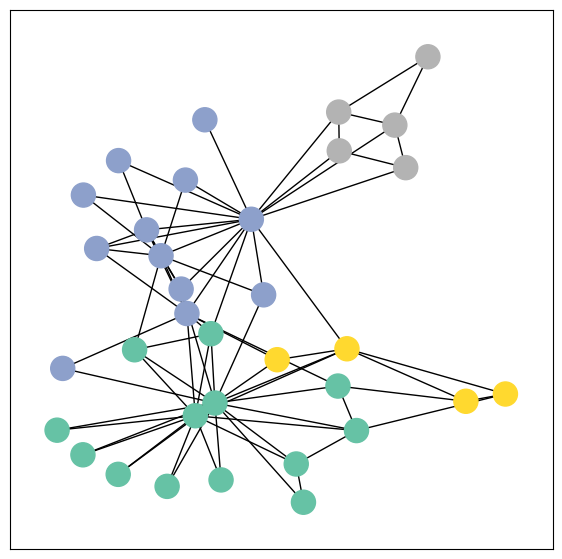

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

#### Creating the GCN Model

At this point we are ready to create our model. To do this in PyTorch, we must extend the `torch.nn.Module` class, and we must include the `__init__` and `forward` functions.

In `__init__`, we define the various layers that we want. In this case, we have defined two GCN layers, and a Linear layer to act as the classifier. We must also be careful to ensure that the output number of features for a layer matches the input number of the next layer.

Next, in `forward`, we determine how the node and edge data will flow through each layer. We are also able to include activation functions here to provide non-linearity. Finally, we return the final output of the model.

##### **The GCN Layer**

The GCN Layer is defined by the following formula that implements the message passing algorithm described above.

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

$\mathbf{W}^{(\ell + 1)}$ denotes the trainable weight matrix of shape `[num_input_features, num_output_features]`. PyTorch Geometric implements this layer as `GCNConv` as seen in the code below.

##### **Activation Functions and Non-Linearity**

Activation functions determine whether a given neuron in a neural network should be activated or not. Non-linear activation functions, such as ReLU (Rectified Linear Unit) or tanh (Hyperbolic Tangent Function) give our model non-linearity. Non-linearity allows our model to make more complex decisions on how to adjust the parameters of the model.

Sources:
- https://www.v7labs.com/blog/neural-networks-activation-functions#h1

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


#### Training and Testing The Model

Now it's time to train and test our first model! In PyTorch, we do this using a training and a testing loop.

First, we must create an instance of the model we created above. Then we define a loss criterion (or loss function), and an optimizer.
- A *loss function* measures how wrong the model's predictions are compared to the truth labels. In a semi-supervised model, we only use the training nodes for this.
- An *optimizer* tells the model how to update its internal parameters to best lower the loss. An optimizer requires a specified *learning rate* or `lr`, which is hyperparameter that affects how quickly the model learns.
- PyTorch has many built in loss functions and optimizers (in the `torch.nn` and `torch.optim` libraries repectively)
- For node classification we will use the [Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) function and the [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam) optimizer.
  - Cross Entropy Loss uses cross-entropy, which is a measure of the difference between two probability distributions for a given random variable or set of events. Cross Entropy Loss is most commonly found in classification problems. (Source: https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

Source: https://www.learnpytorch.io/01_pytorch_workflow/

For our training loop, the steps are the following:
1. Clear the gradients using `optimizer.zero_grad()`
2. Do a forward pass of the data and the edge index through the model and get the outputs using `out, h = model(data.x, data.edge_index`.
3. Compute the loss solely based on the training nodes. Use use the training mask for this in `loss = criterion(out[data.train_mask], data.y[data.train_mask])`
4. Perform backpropagation to derive the new gradients for this step using the loss function. `loss.backward()`
5. Using the calculated gradients, the optimizer will update the model's parameters. `optimizer.step()`

For our testing loop, the steps are the following:
1. Specify `@torch.no_grad()`. This simply disables gradient calculation for our testing function, since it is not needed for testing.
2. Set the model to evaluation mode using `model.eval()`.
3. Get the output from the model's current iteration and initialize an empty array for the accuracy value.
4. Then, using only the testing nodes (`'test_mask`), calculate the accuracy.

We can then use these train and test functions in a loop for a certain amount of *epochs*, or iterations. It's also helpful to use the embedding visualization helper function to keep track of how the neural network is being updated, but it isn't necessary.

<IPython.core.display.Javascript object>

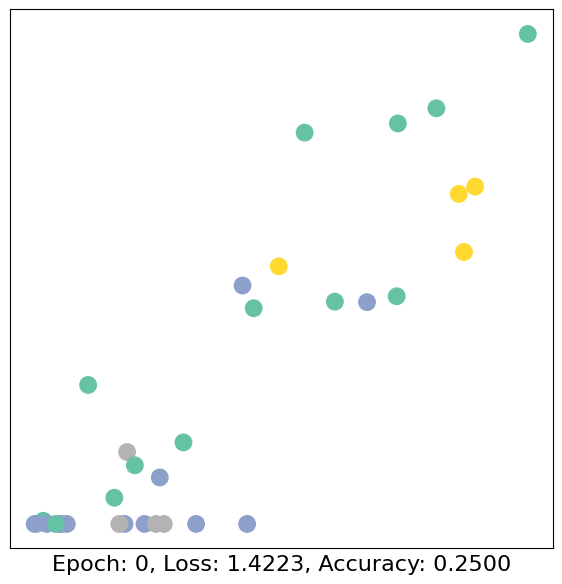

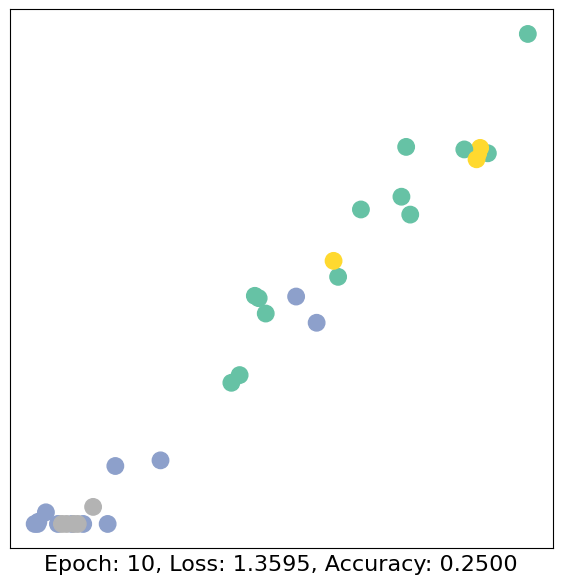

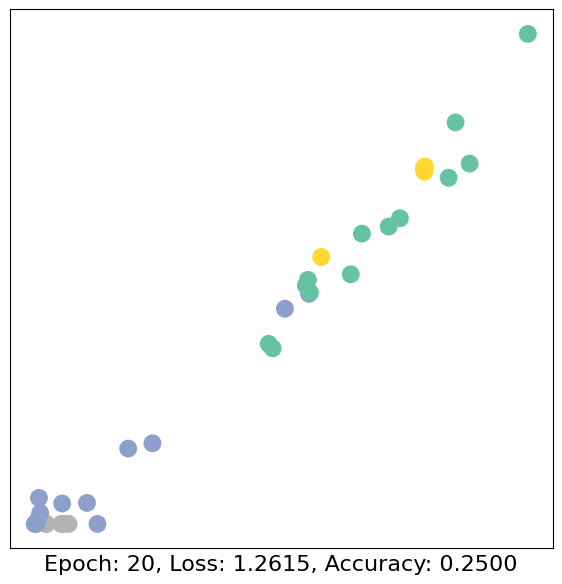

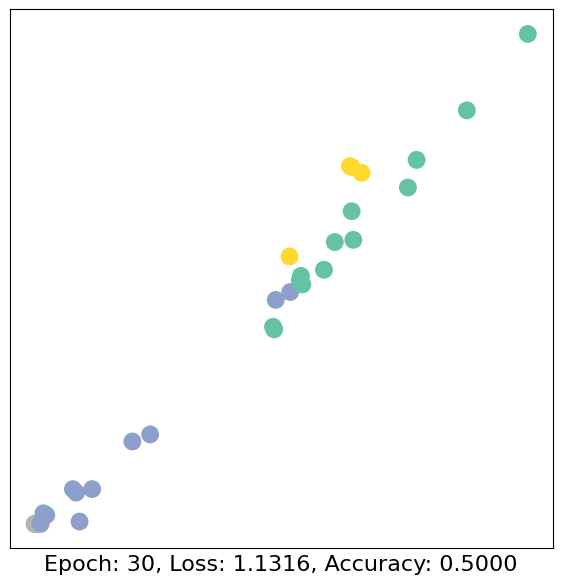

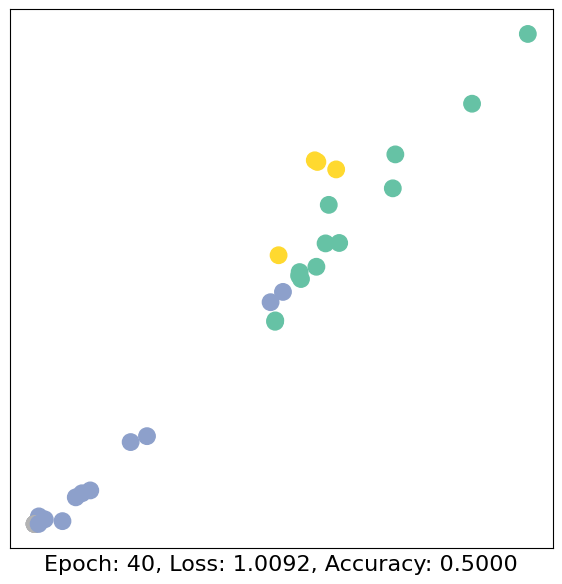

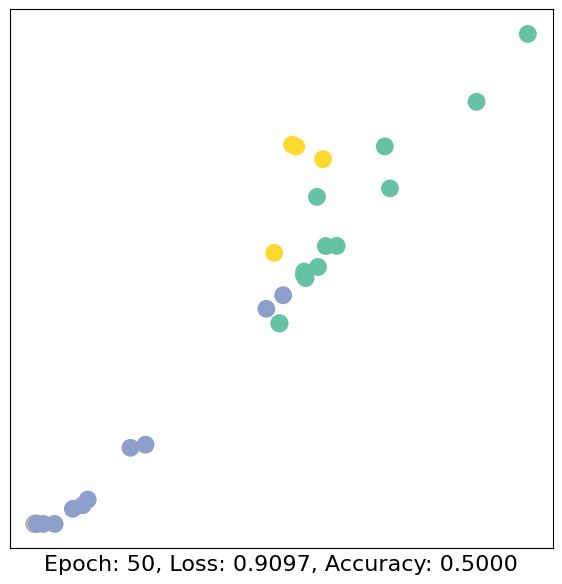

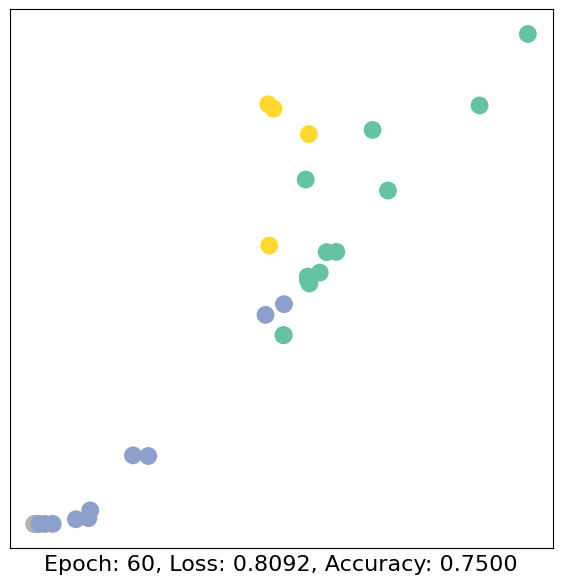

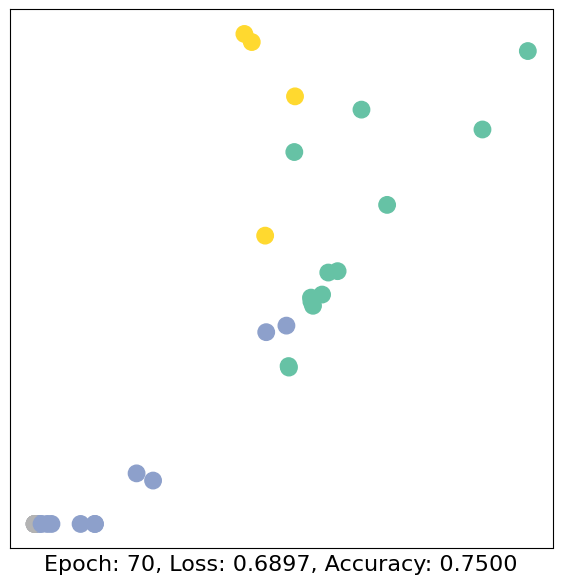

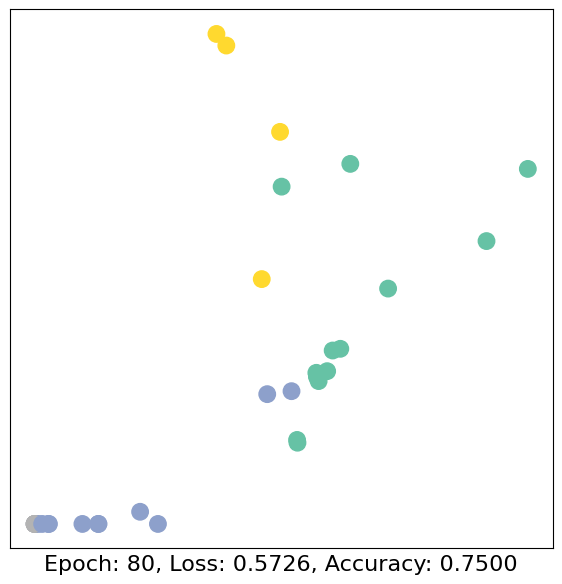

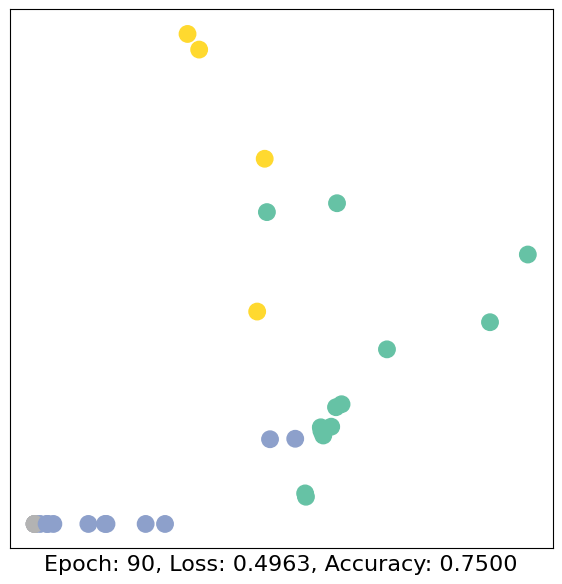

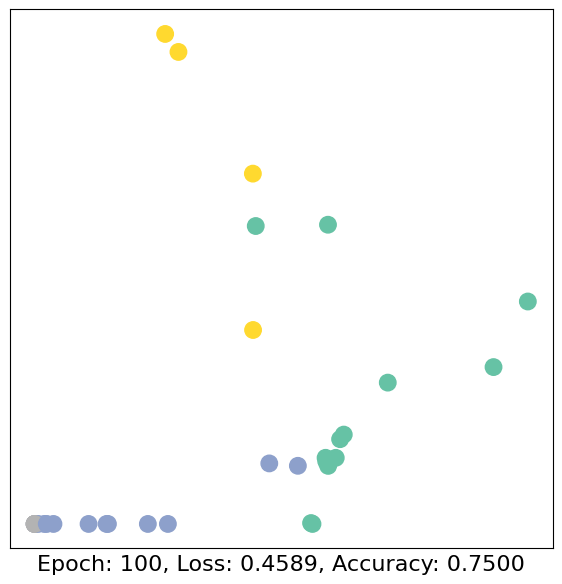

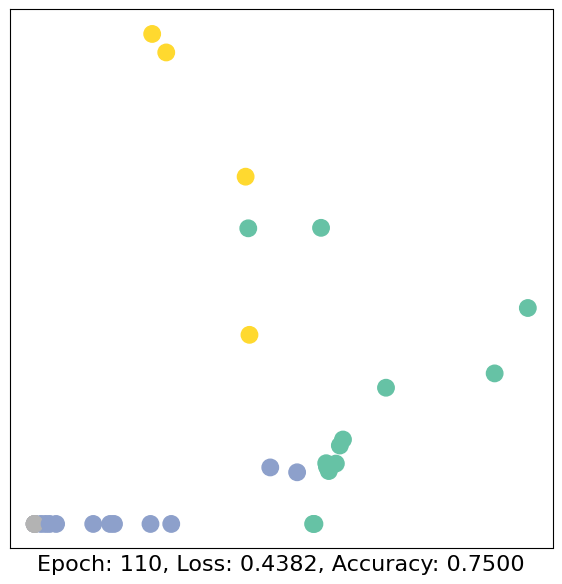

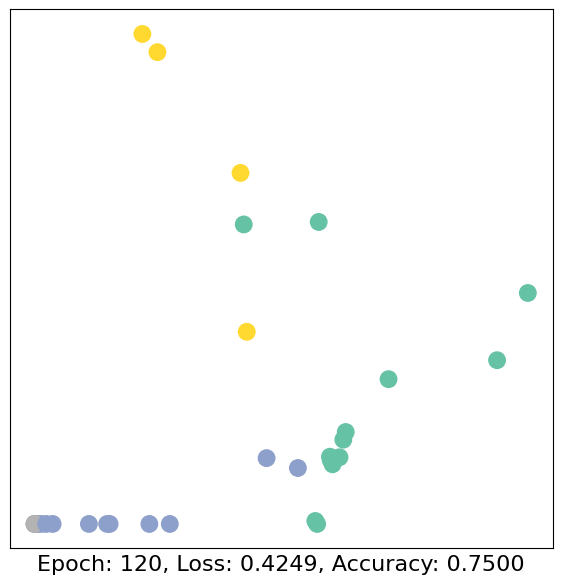

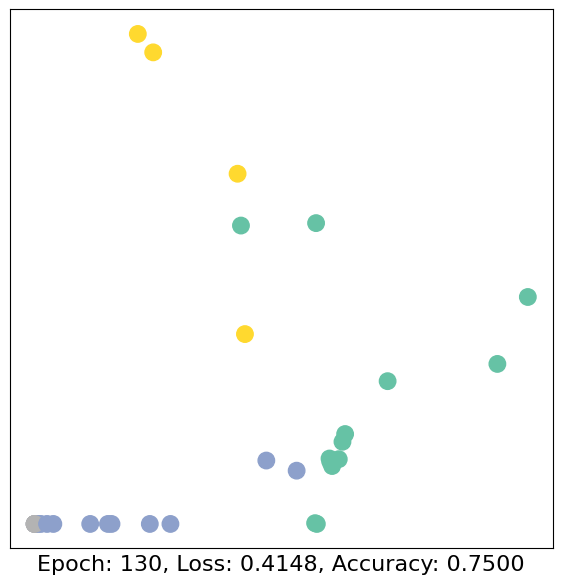

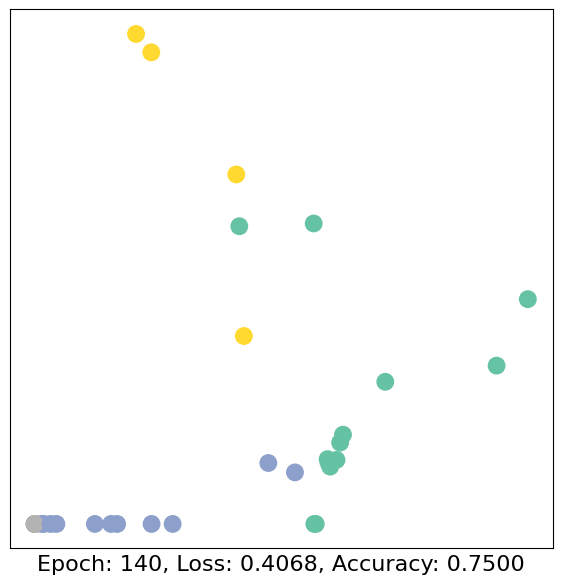

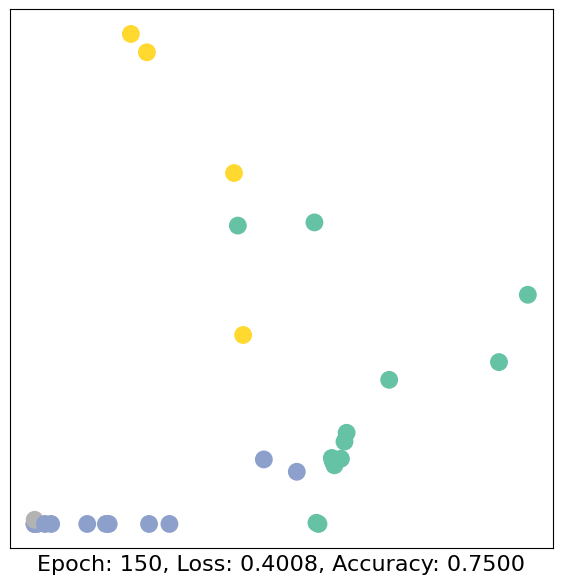

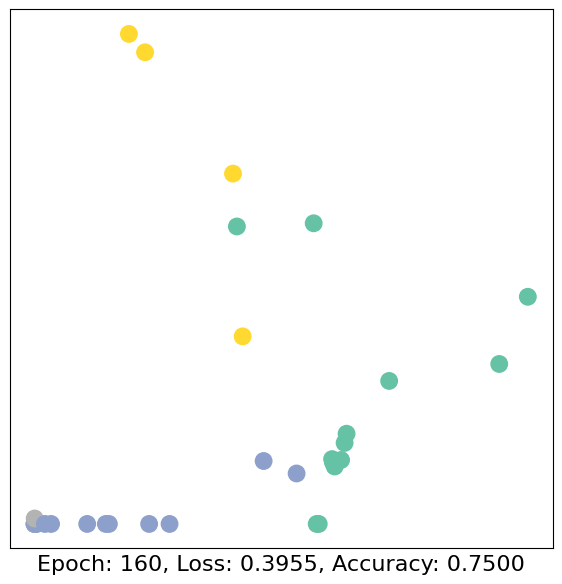

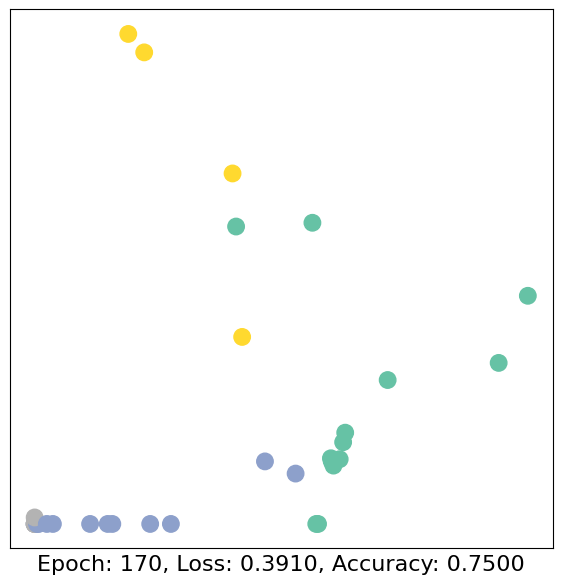

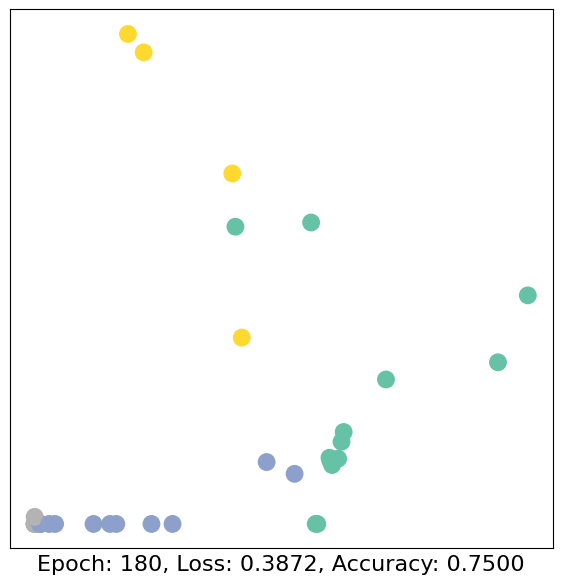

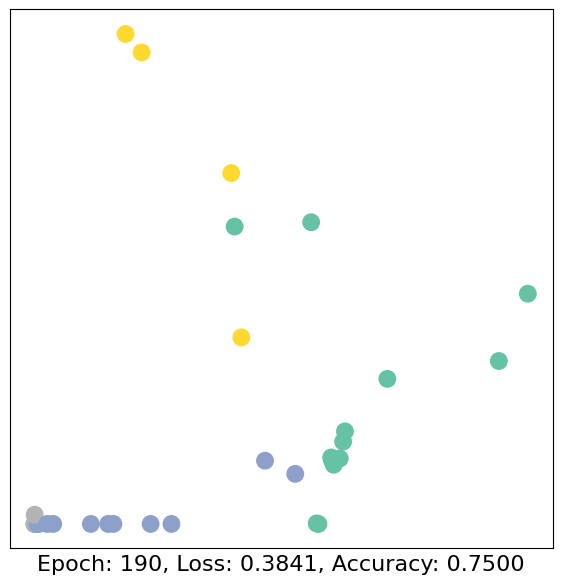

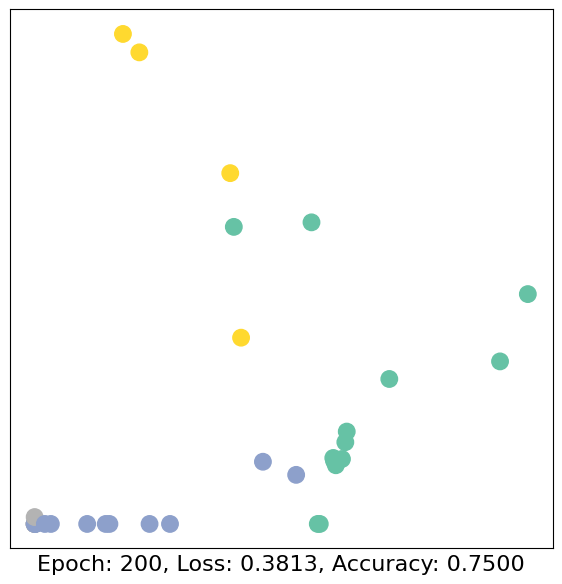

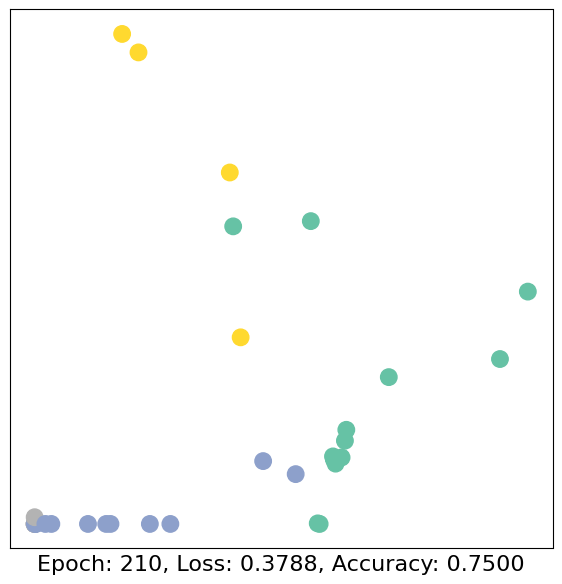

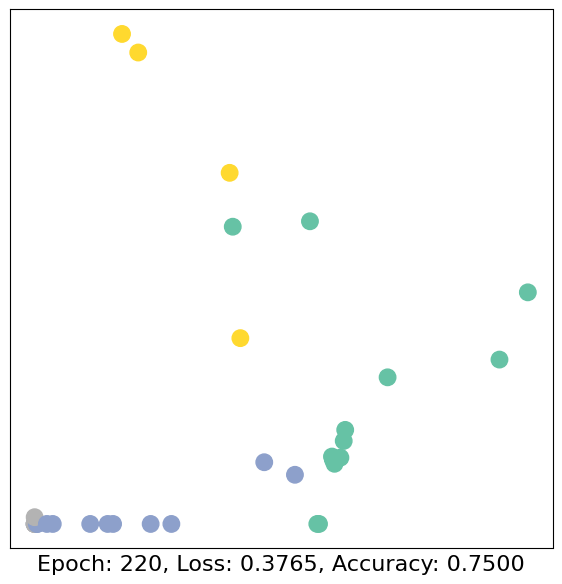

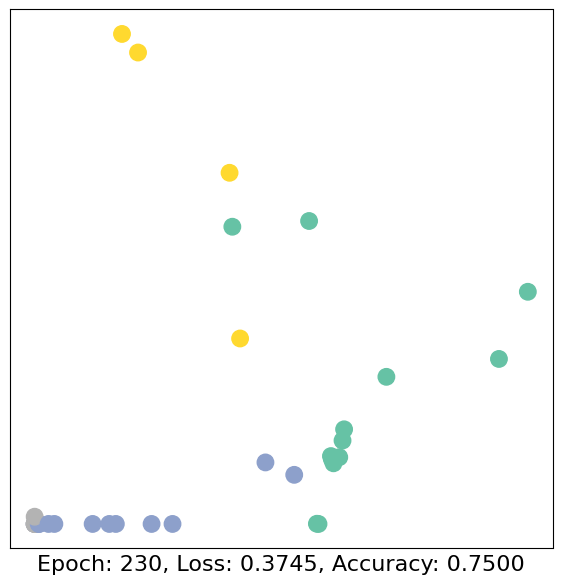

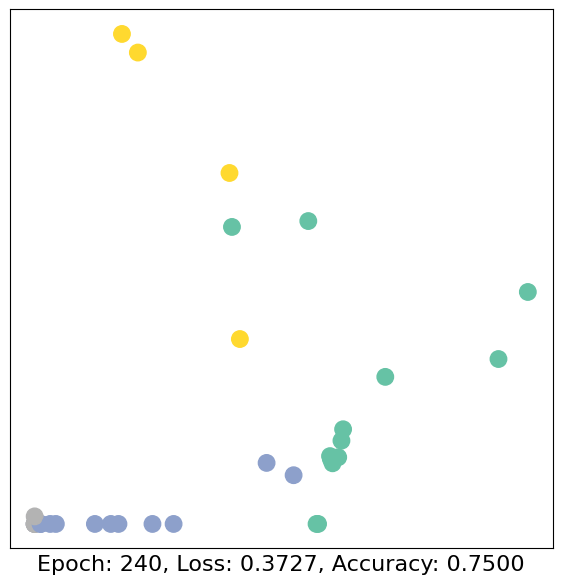

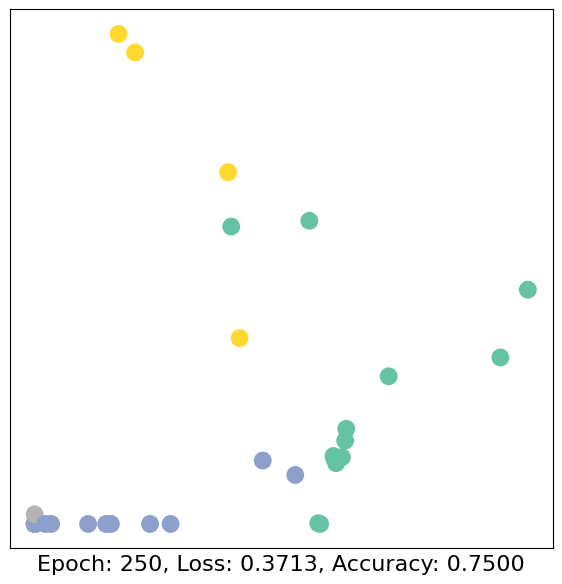

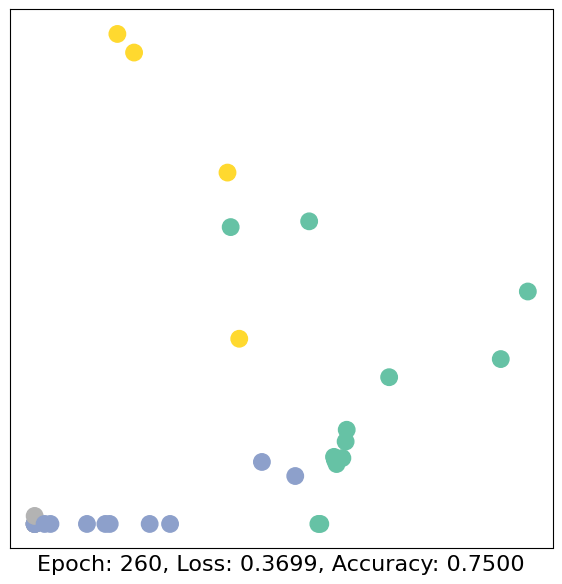

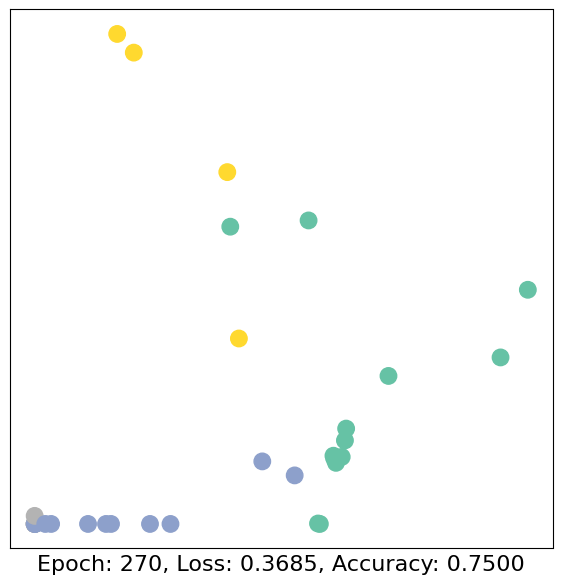

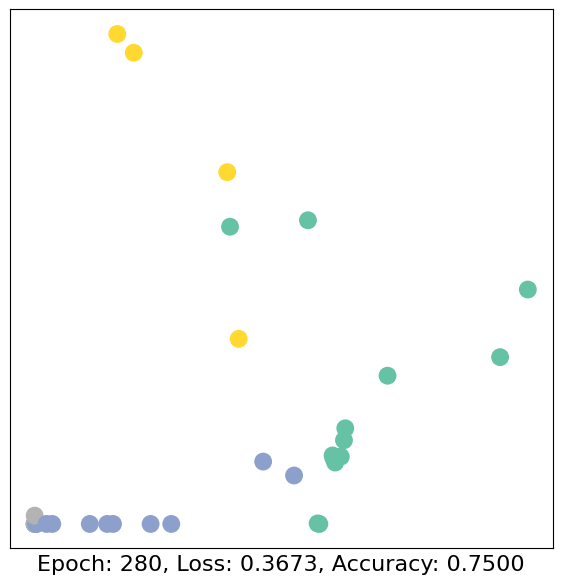

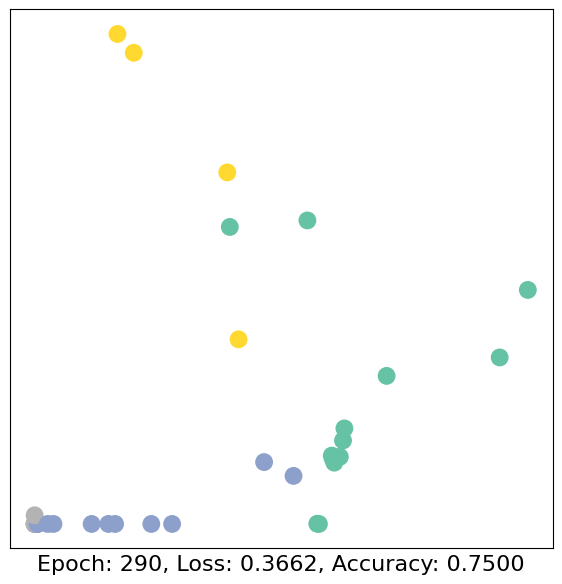

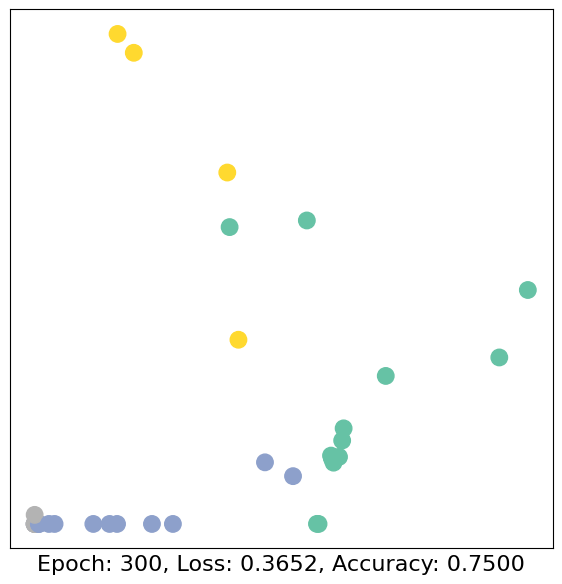

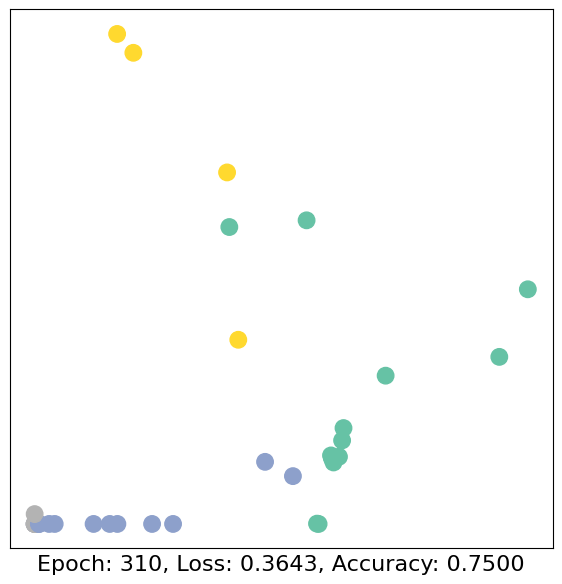

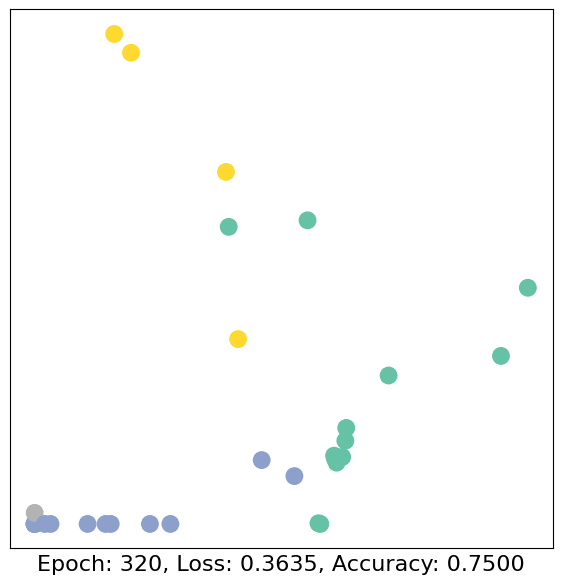

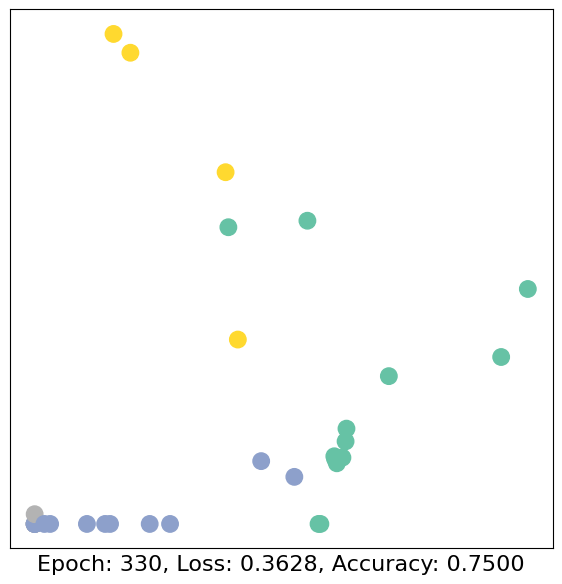

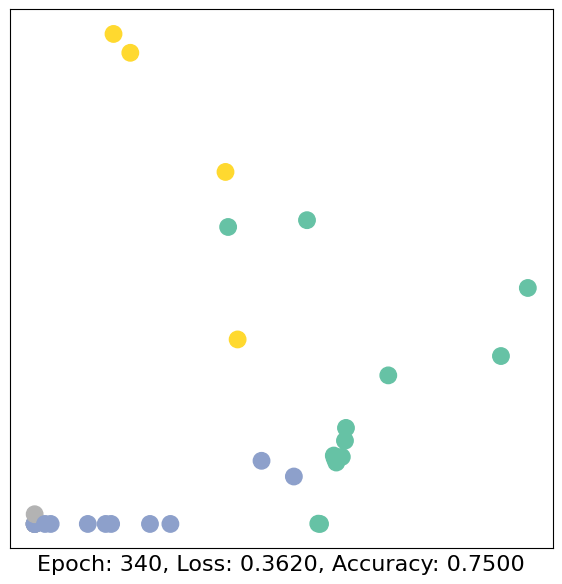

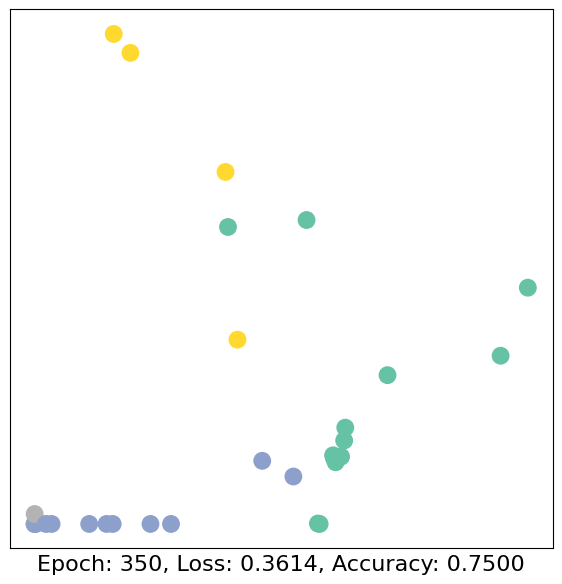

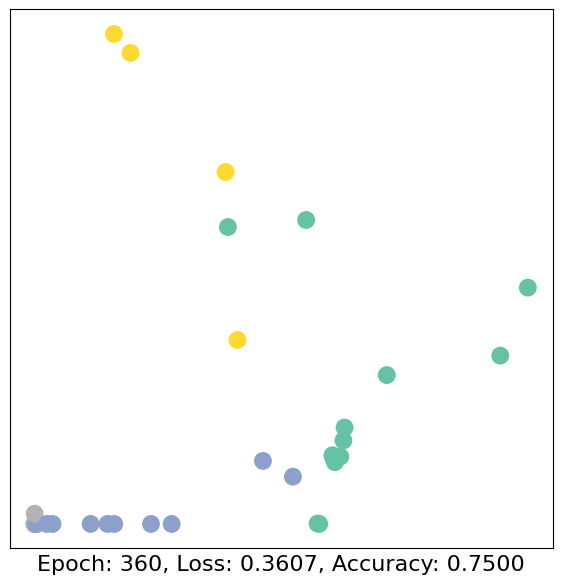

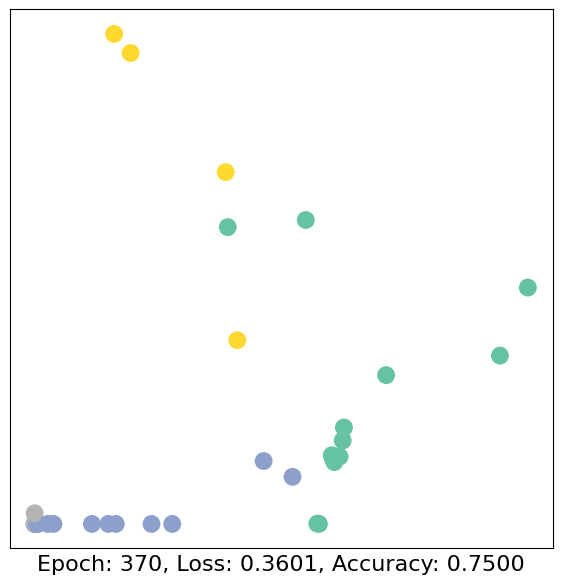

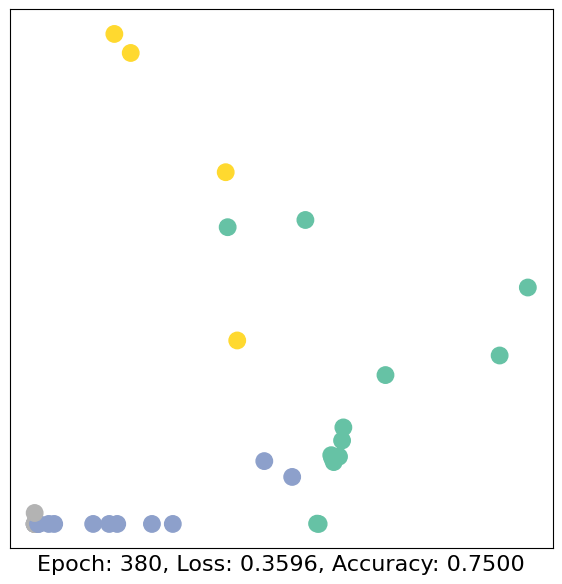

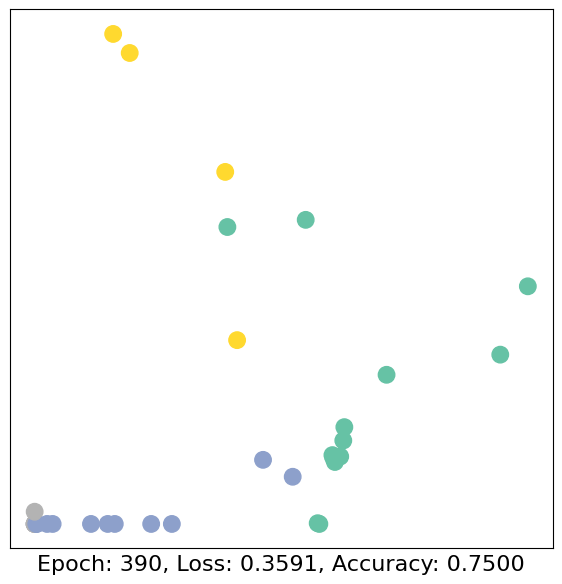

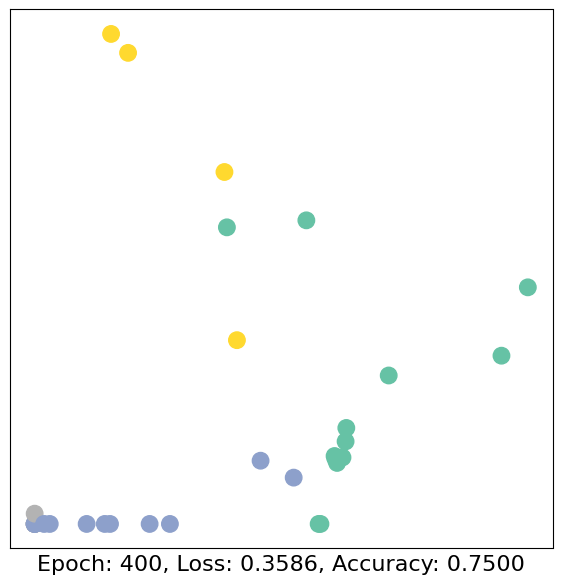

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

@torch.no_grad()
def test(data):
    model.eval()
    log_probs, h = model(data.x, data.edge_index)
    accs = []
    for _, mask in data('train_mask', 'test_mask'):
        pred = log_probs[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs

for epoch in range(401):
    loss, h = train(data)
    accs = test(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss, accs=accs)
        time.sleep(0.3)

### Cora

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root="", name="Cora")
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7


Done!


In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


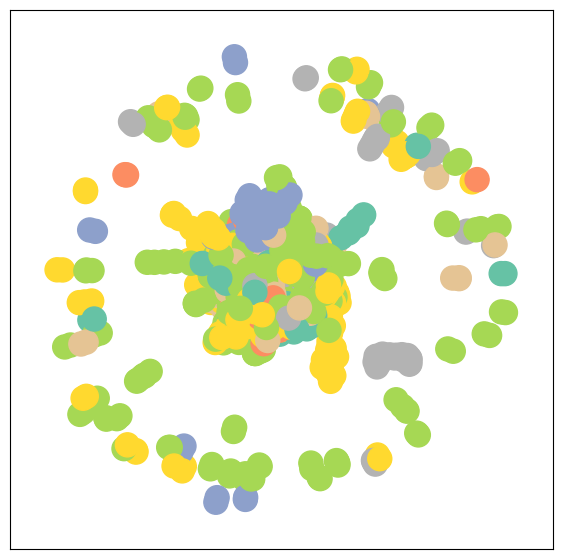

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(1433, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=7, bias=True)
)


Embedding shape: [2708, 2]


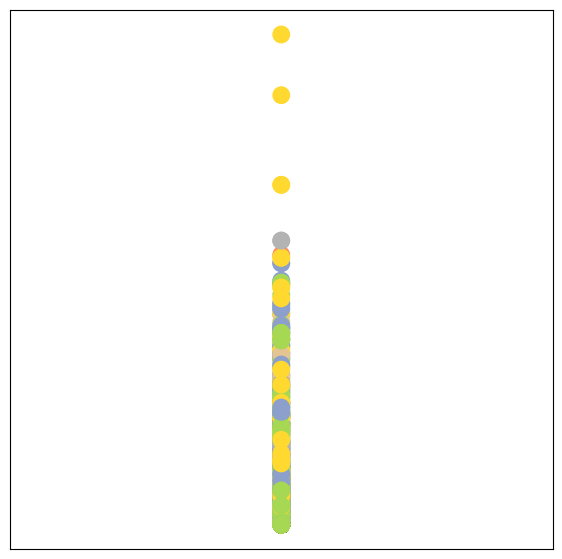

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

<IPython.core.display.Javascript object>

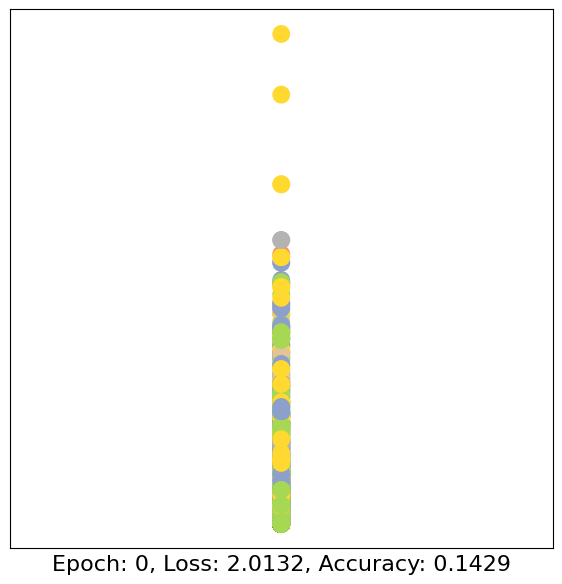

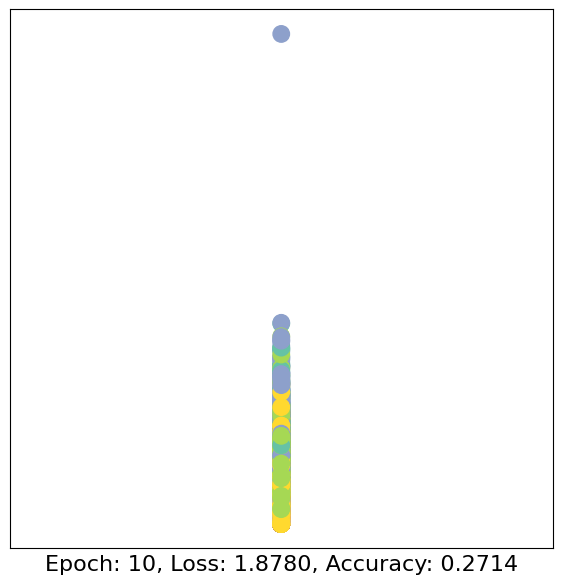

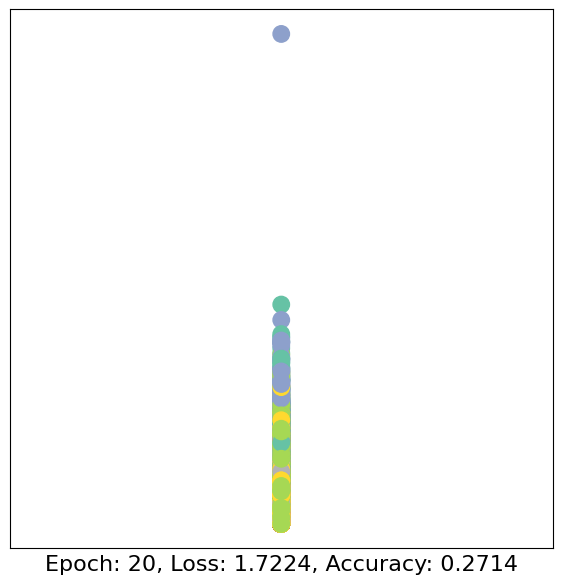

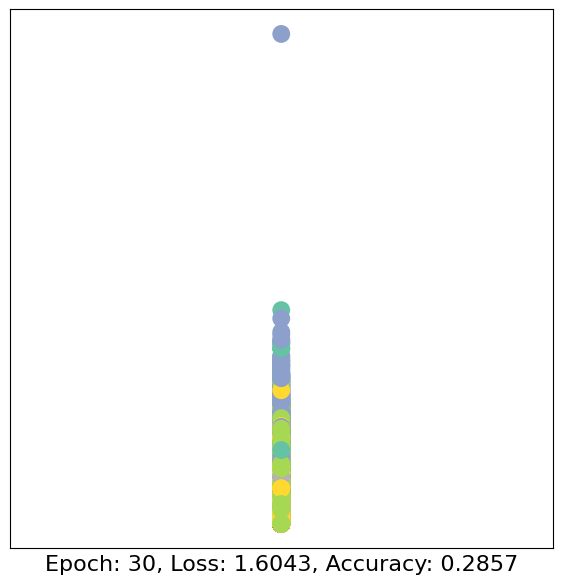

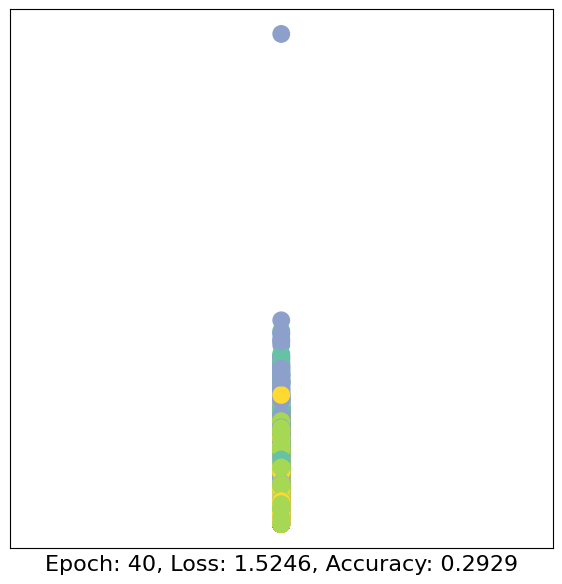

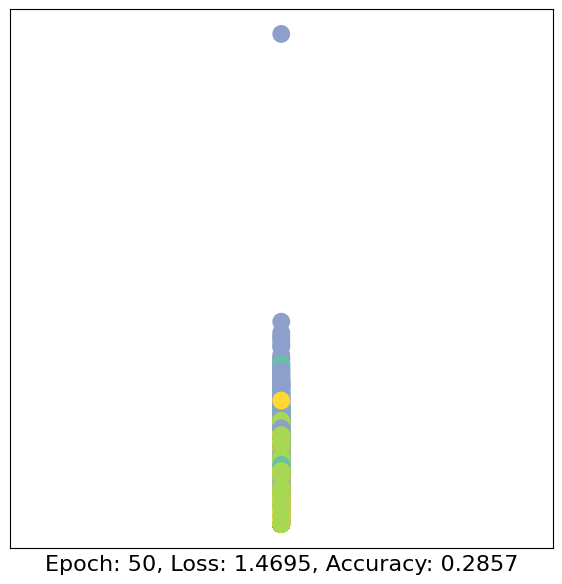

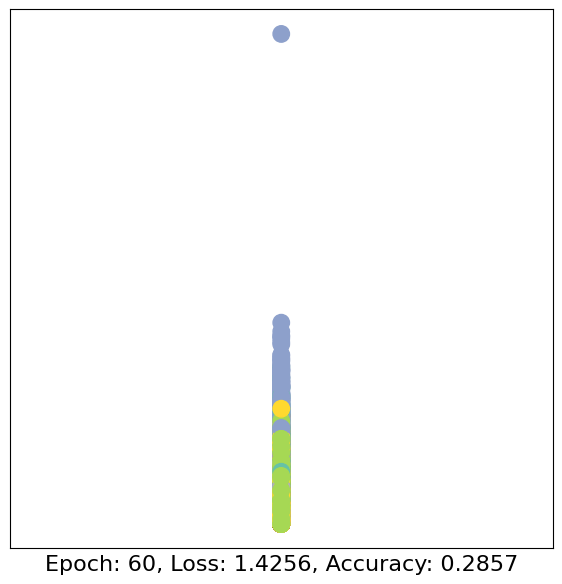

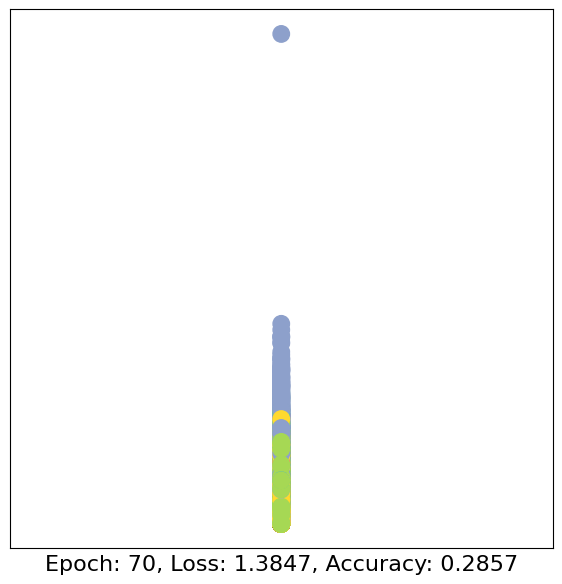

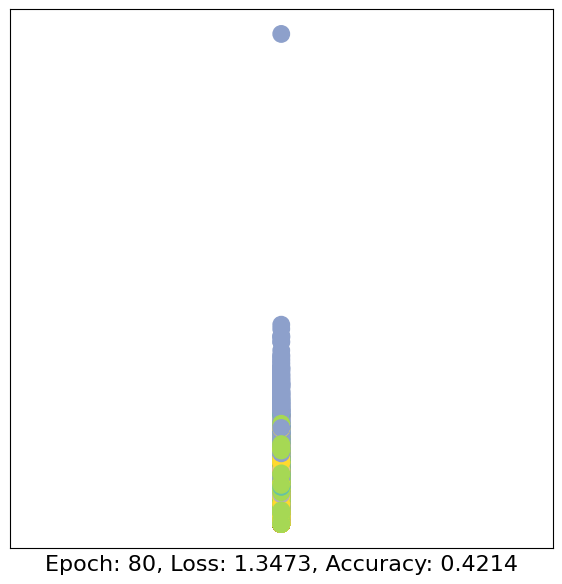

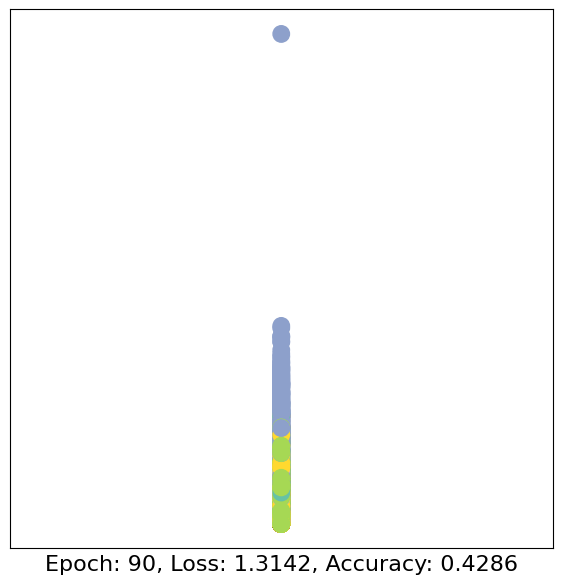

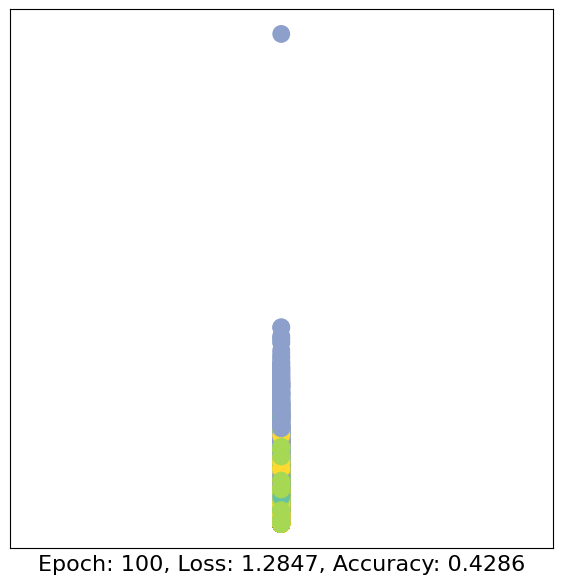

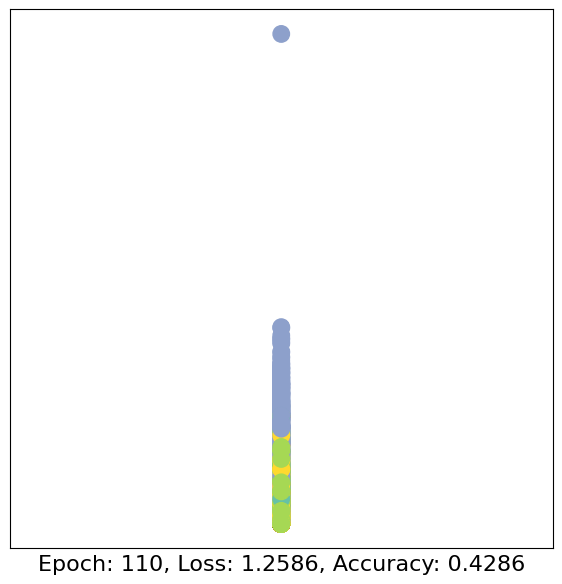

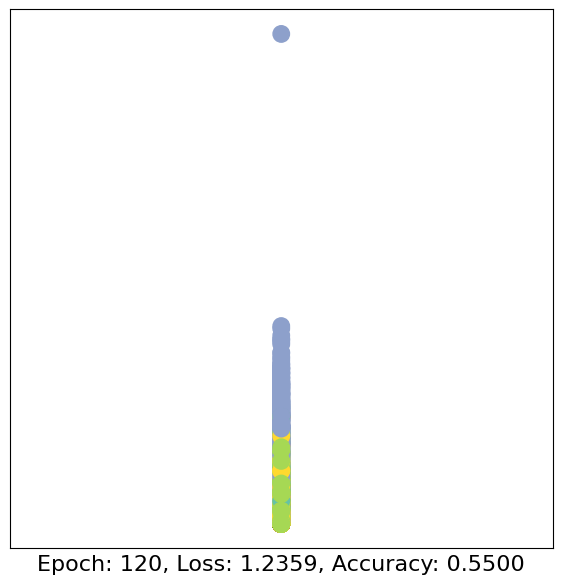

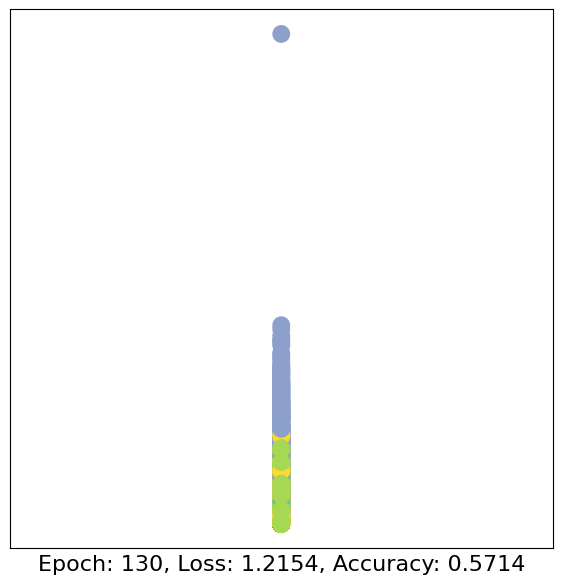

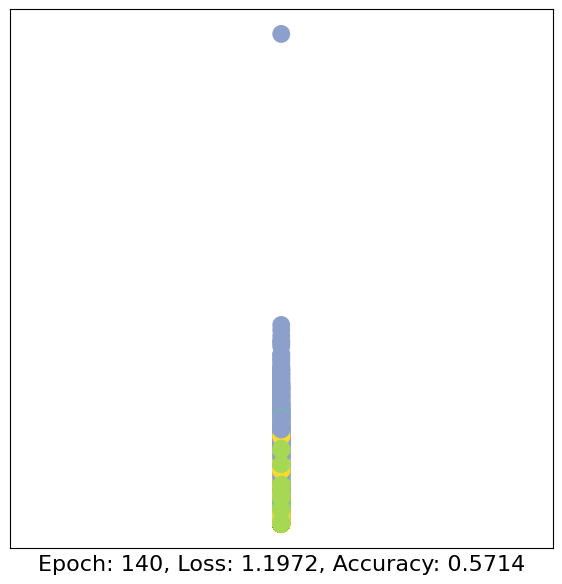

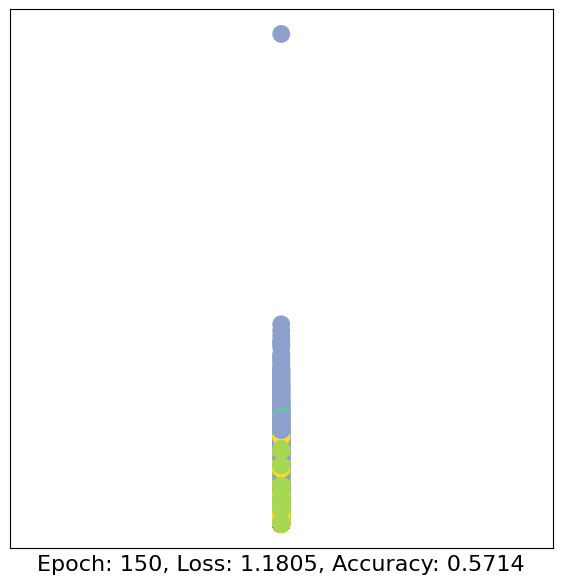

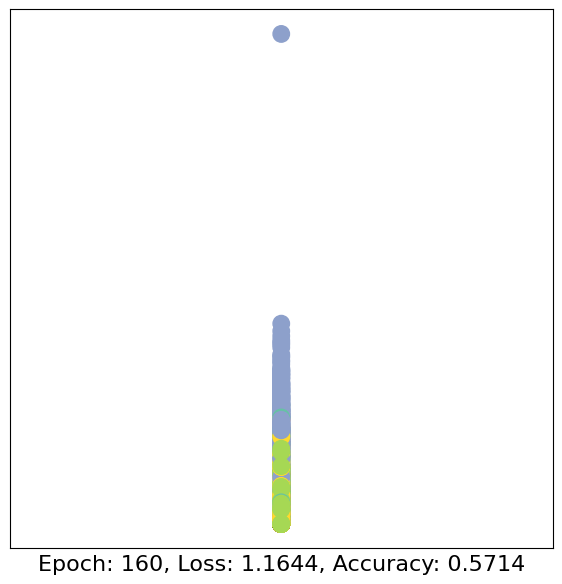

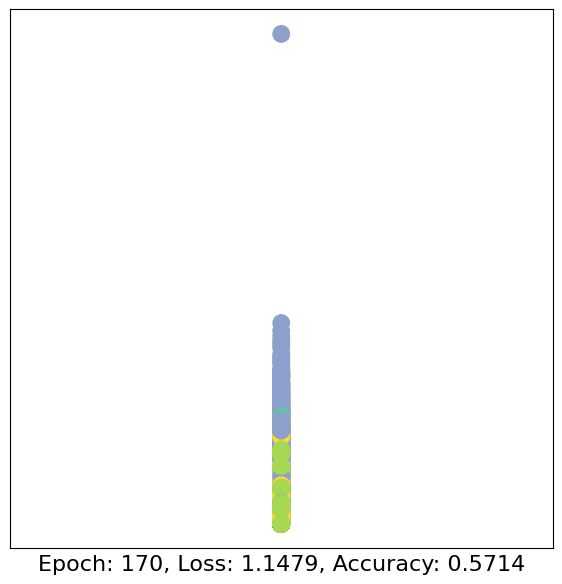

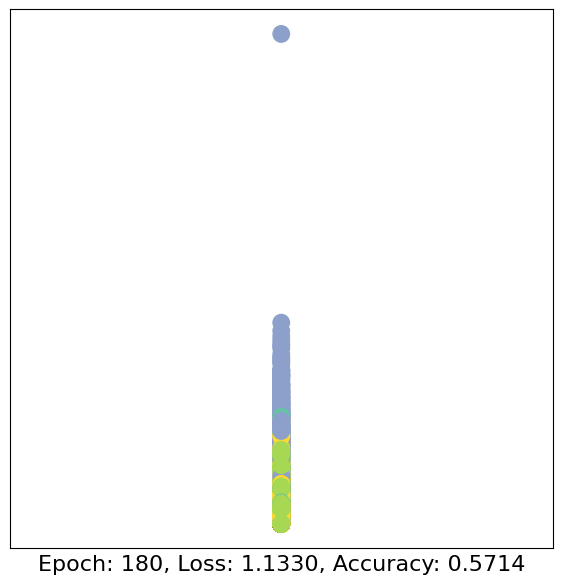

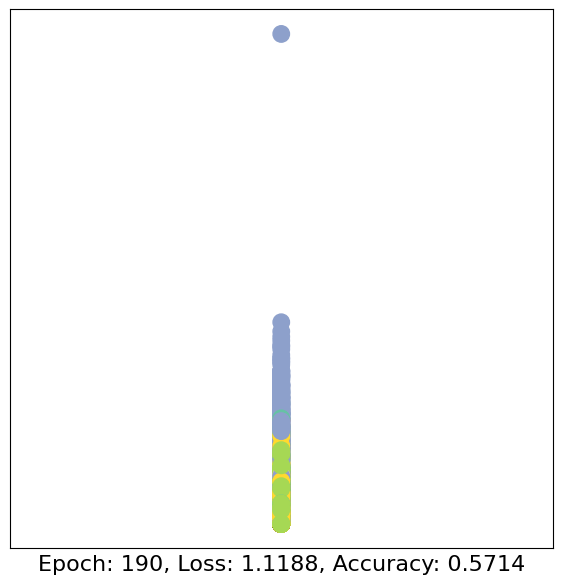

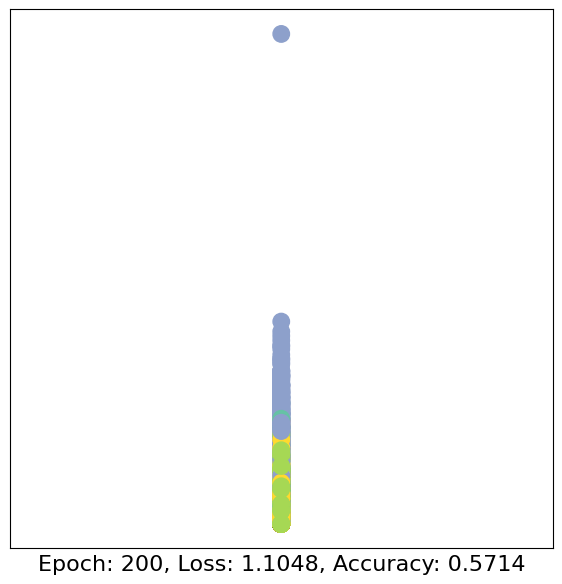

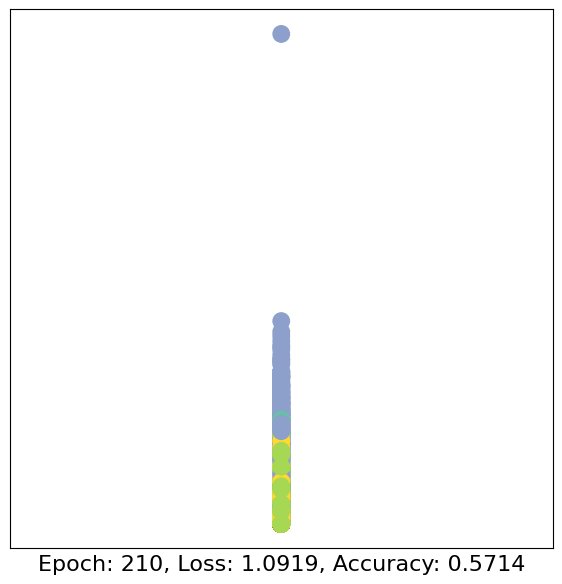

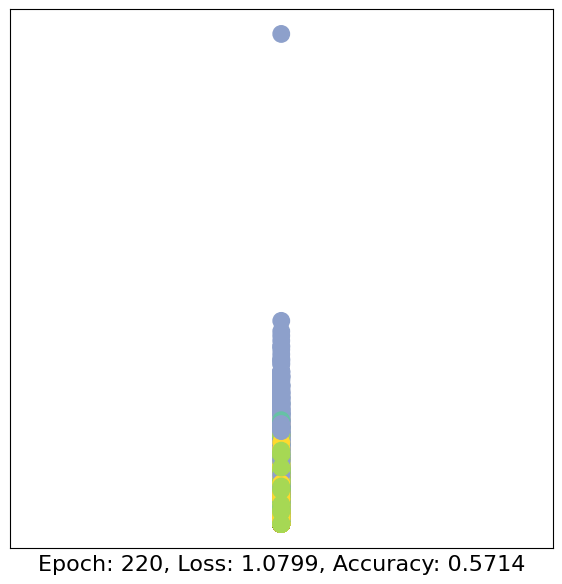

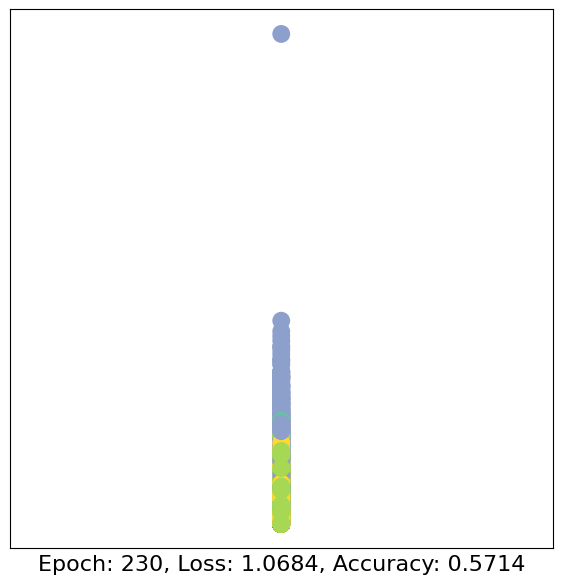

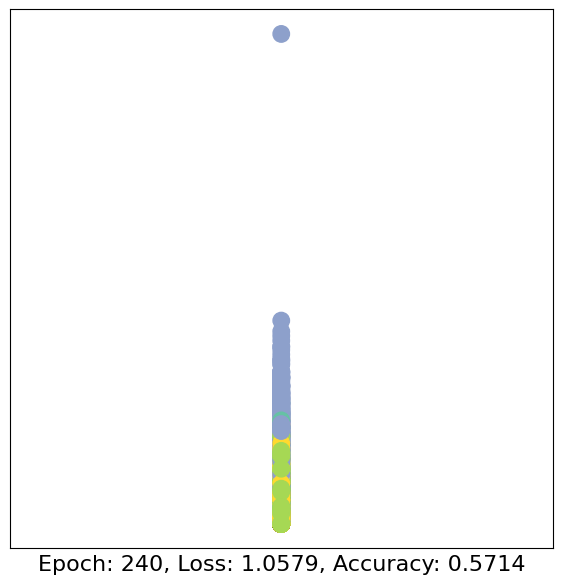

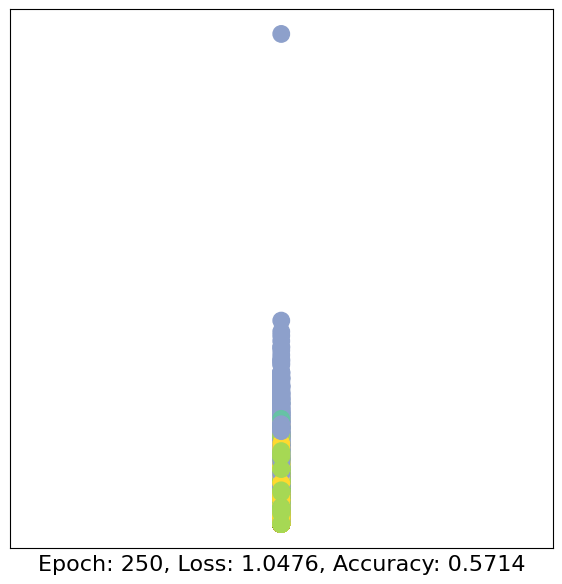

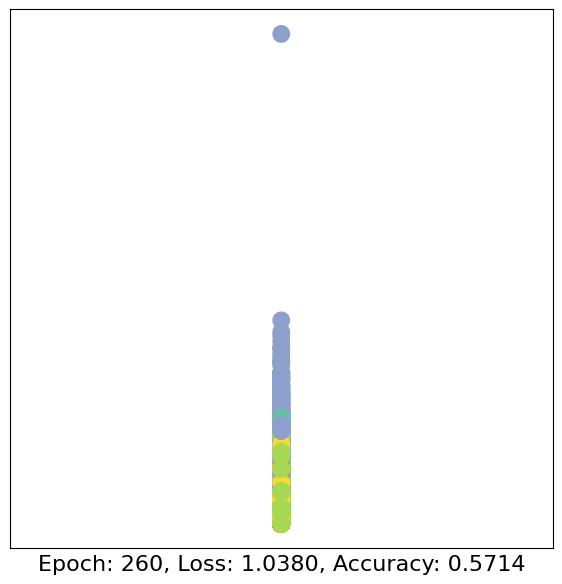

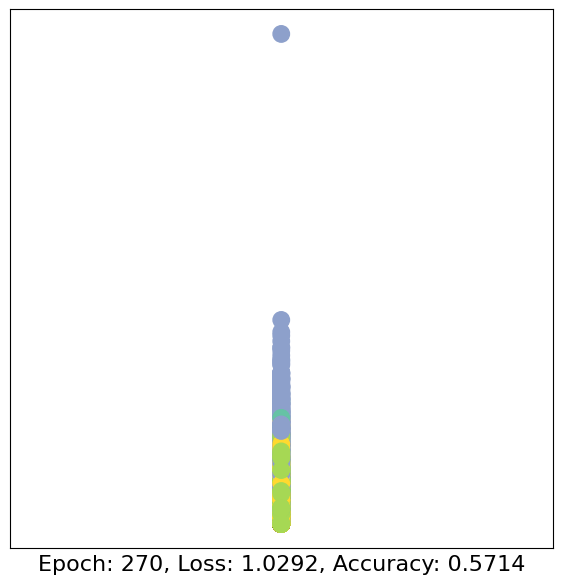

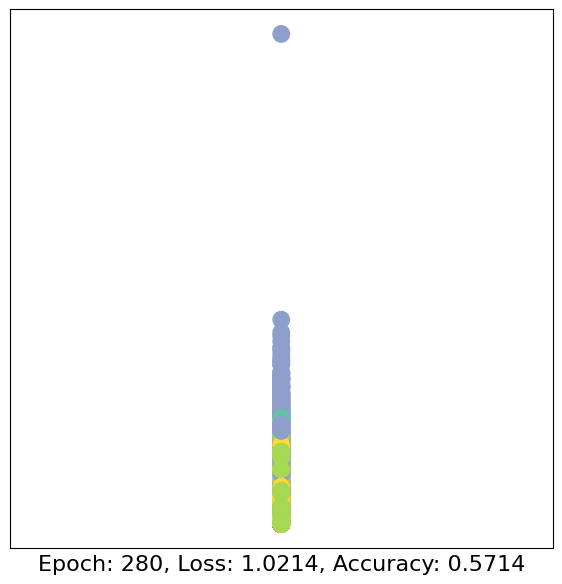

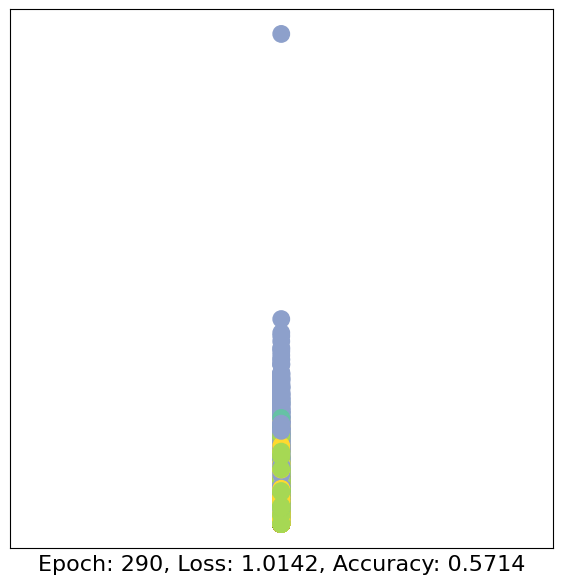

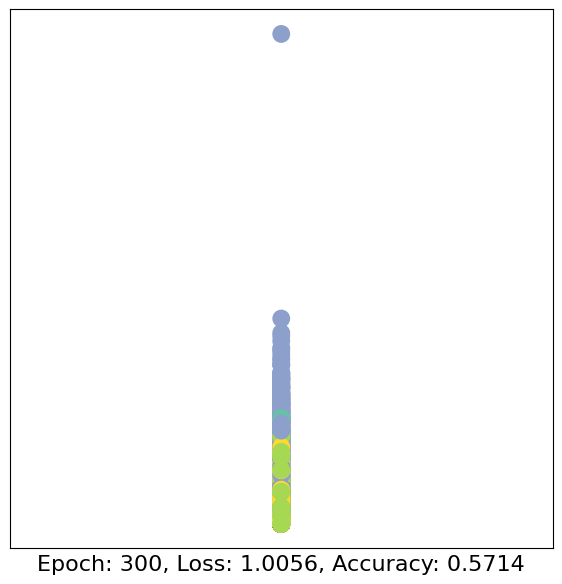

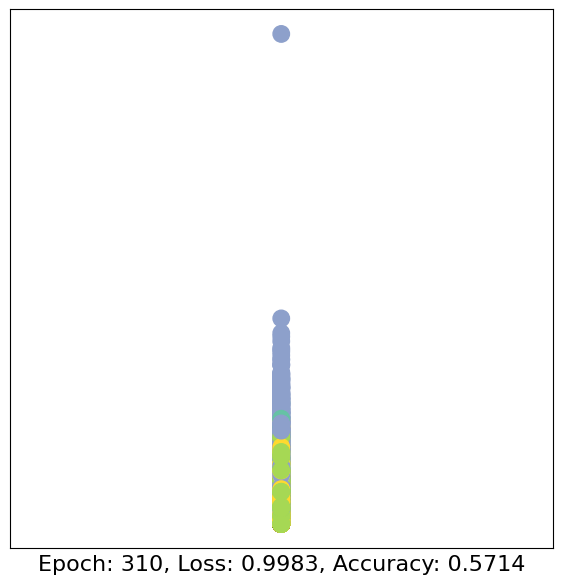

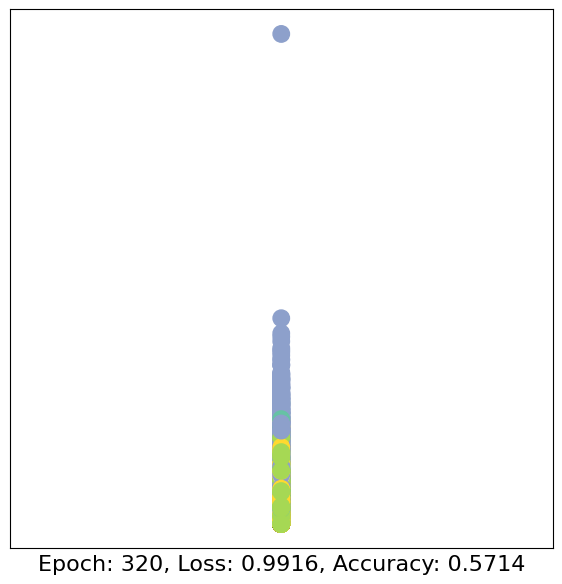

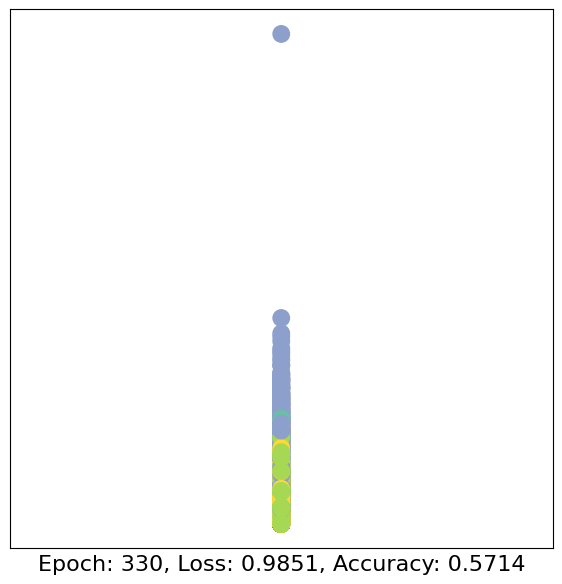

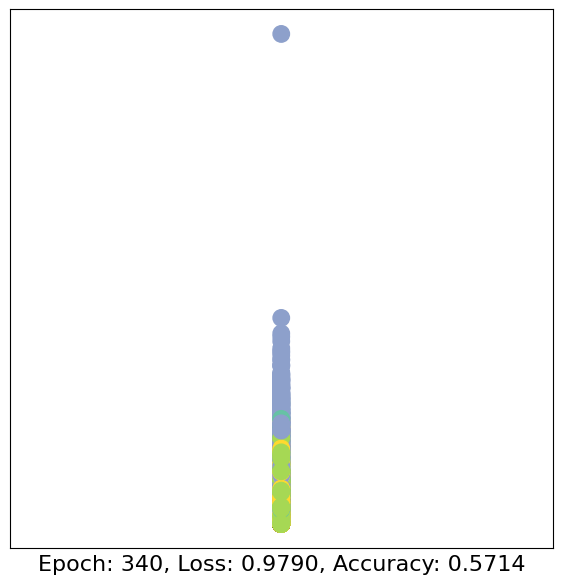

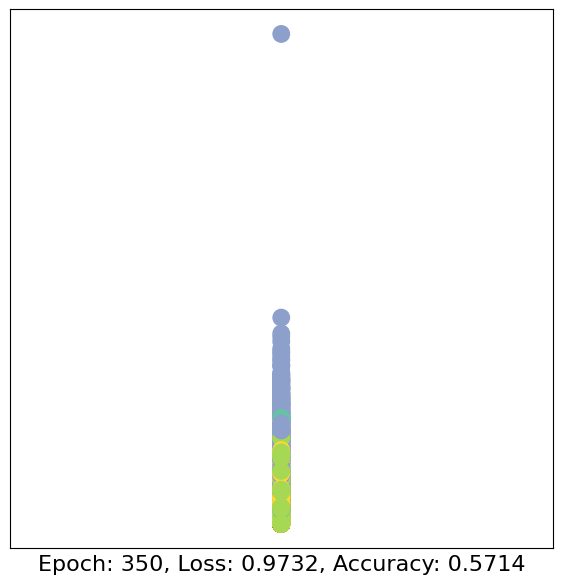

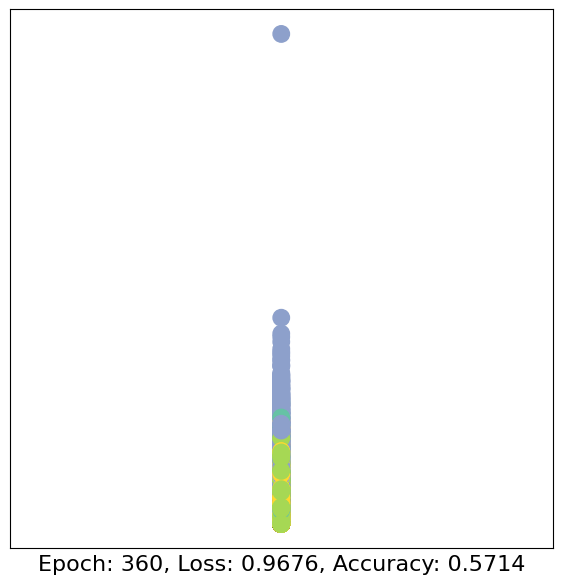

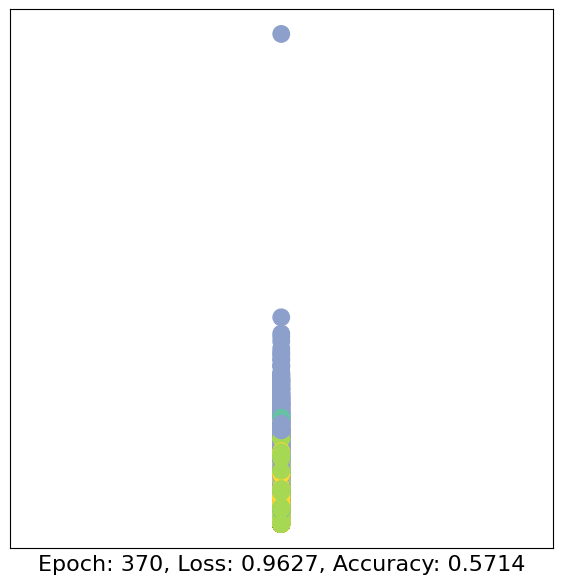

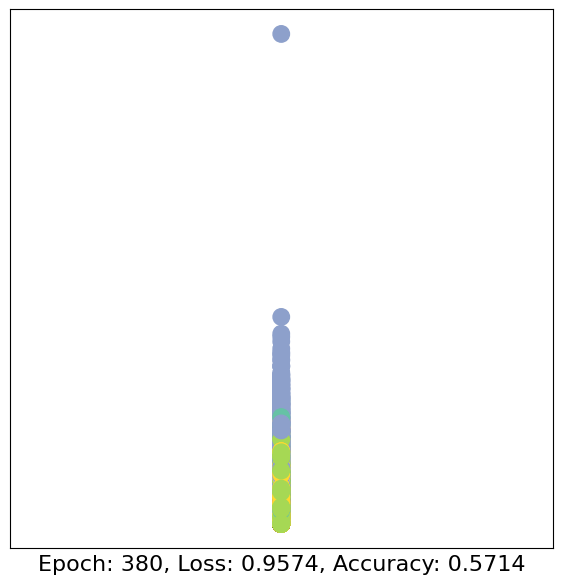

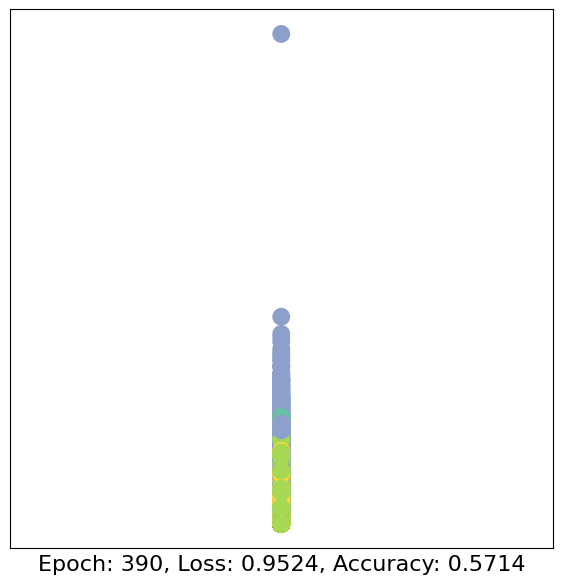

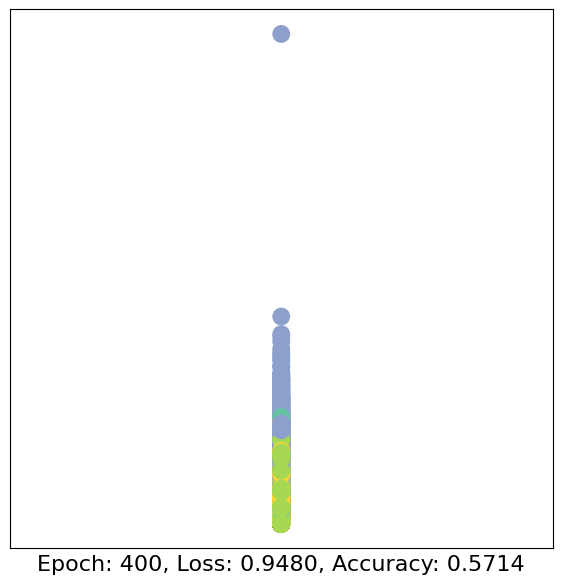

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

@torch.no_grad()
def test(data):
    model.eval()
    log_probs, h = model(data.x, data.edge_index)
    accs = []
    for _, mask in data('train_mask', 'test_mask'):
        pred = log_probs[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs

for epoch in range(401):
    loss, h = train(data)
    accs = test(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss, accs=accs)
        time.sleep(0.3)

### CiteSeer

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root="", name="CiteSeer")
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...


Dataset: CiteSeer():
Number of graphs: 1
Number of features: 3703
Number of classes: 6


Done!


In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])
Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Number of training nodes: 120
Training node label rate: 0.04
Has isolated nodes: True
Has self-loops: False
Is undirected: True


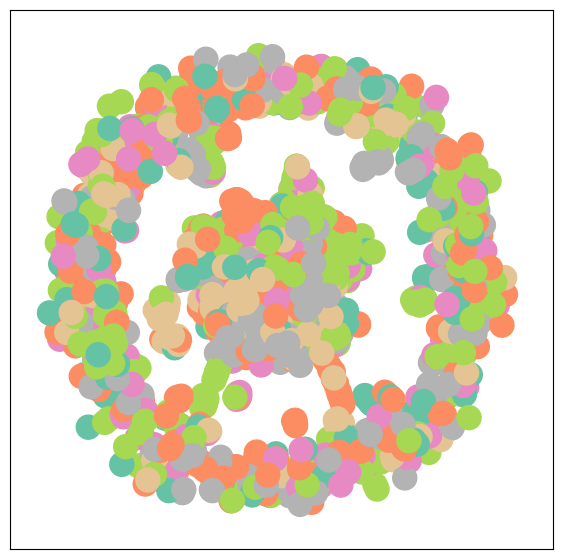

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(3703, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=6, bias=True)
)


Embedding shape: [3327, 2]


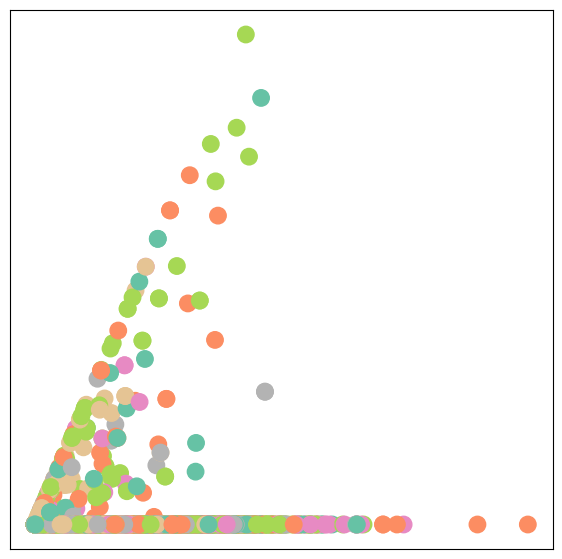

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

<IPython.core.display.Javascript object>

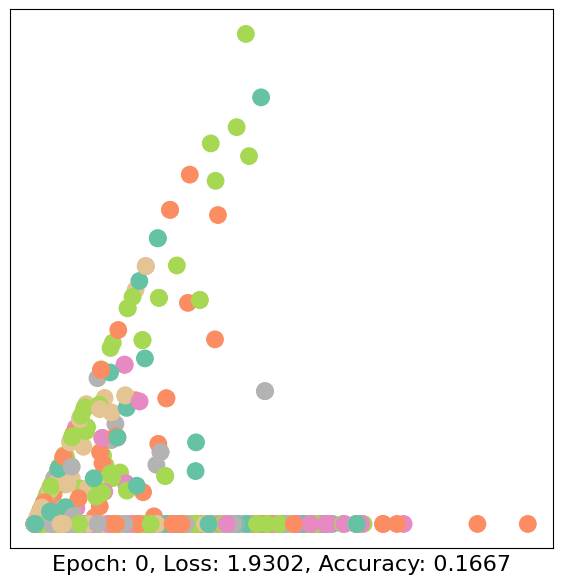

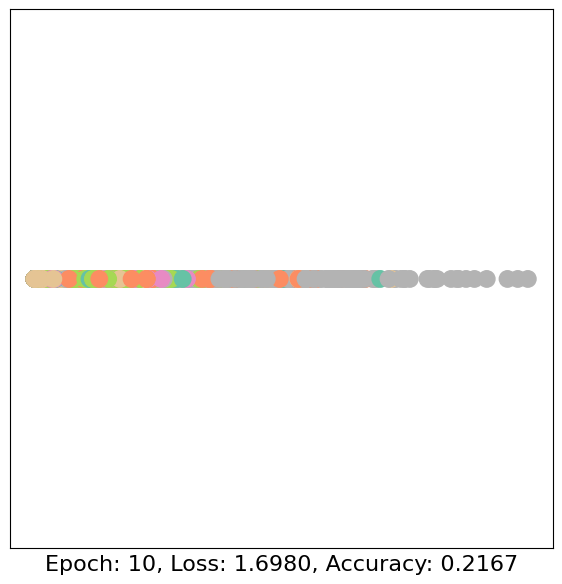

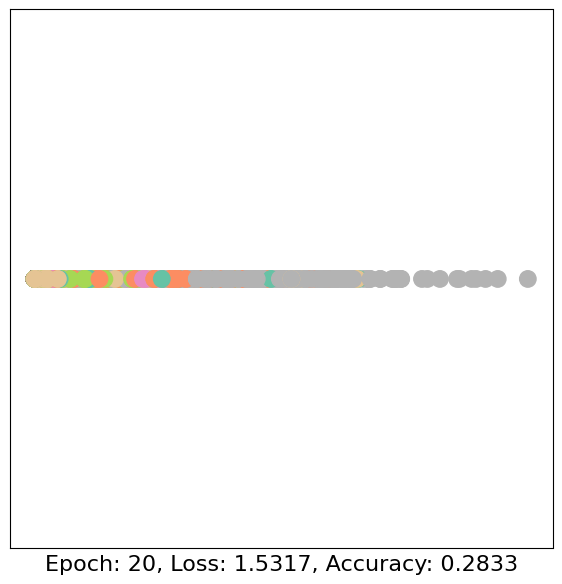

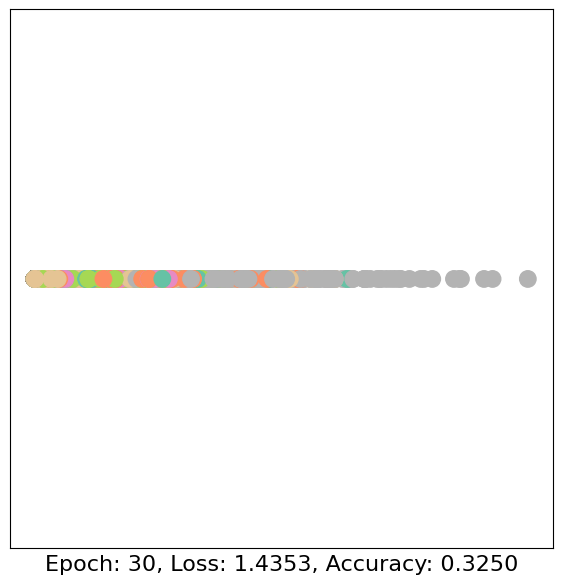

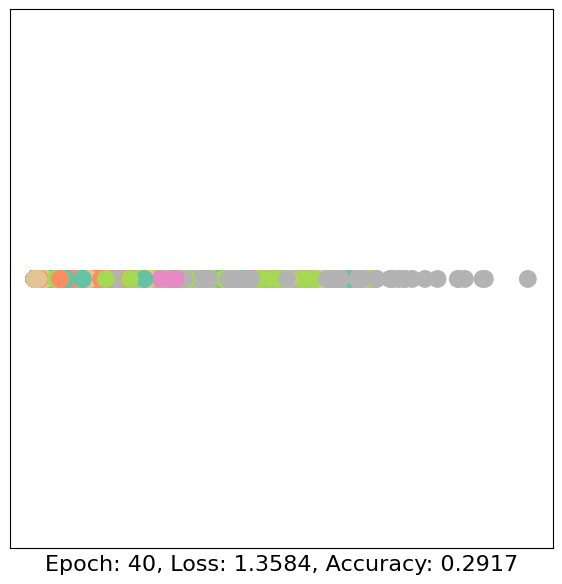

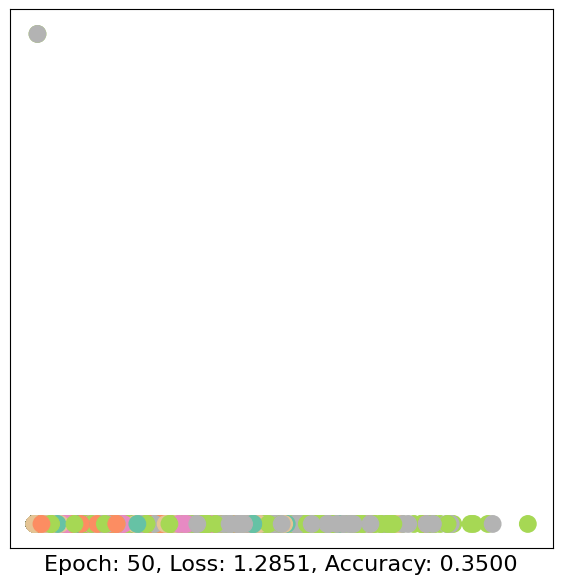

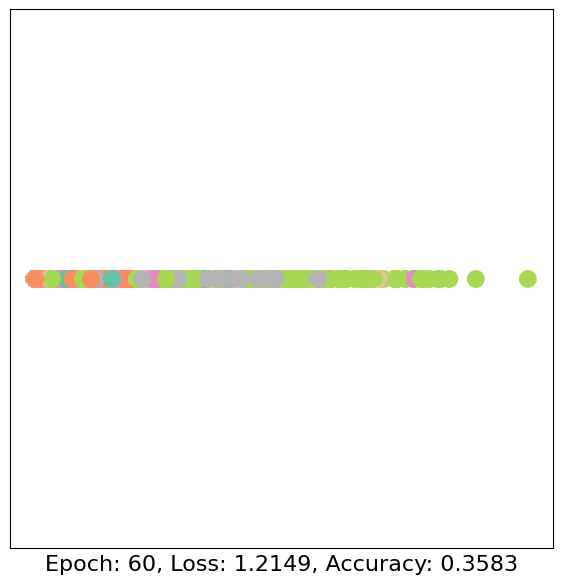

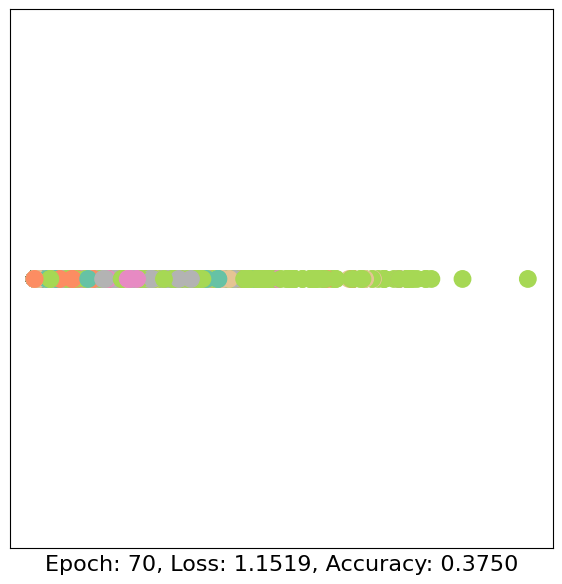

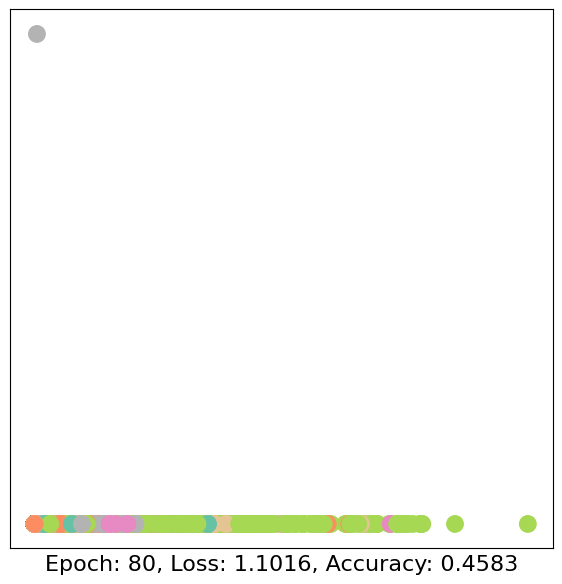

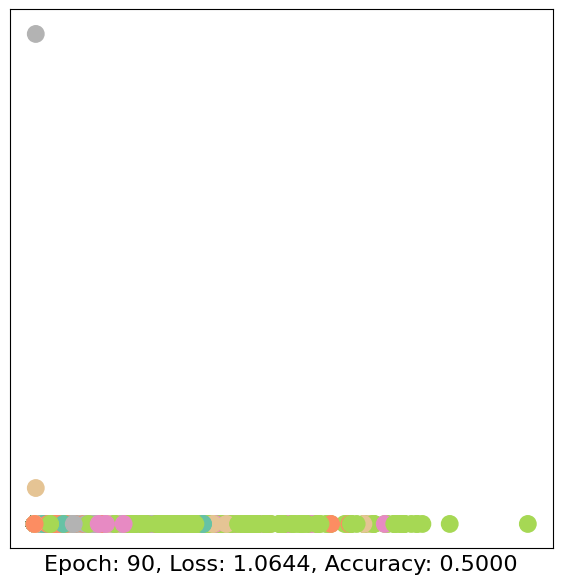

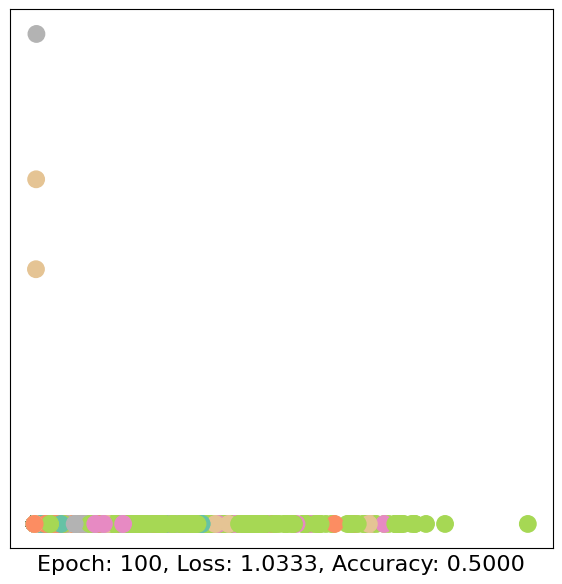

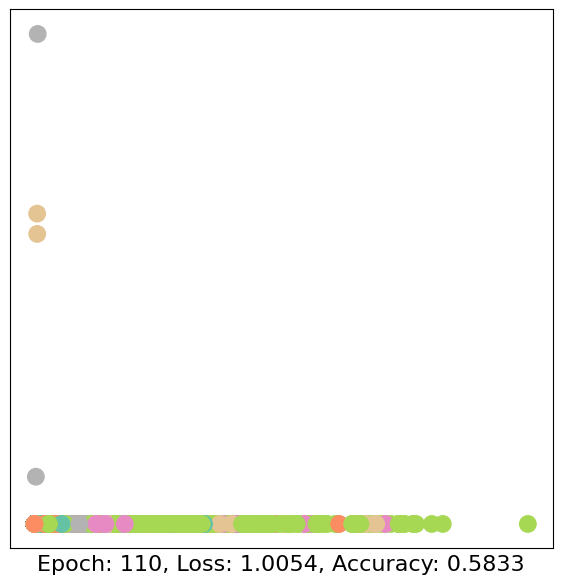

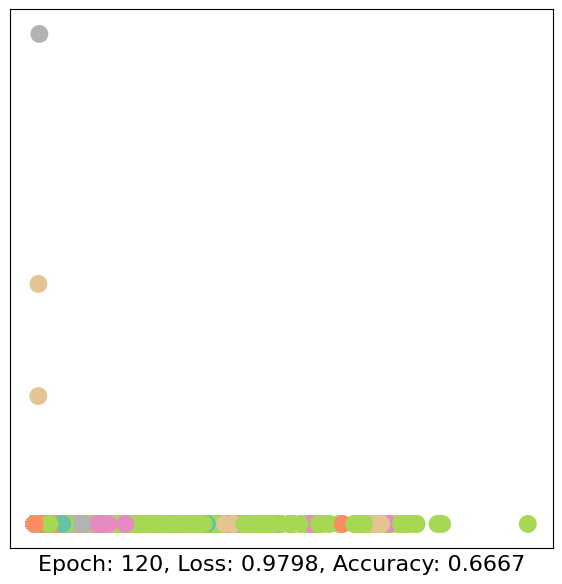

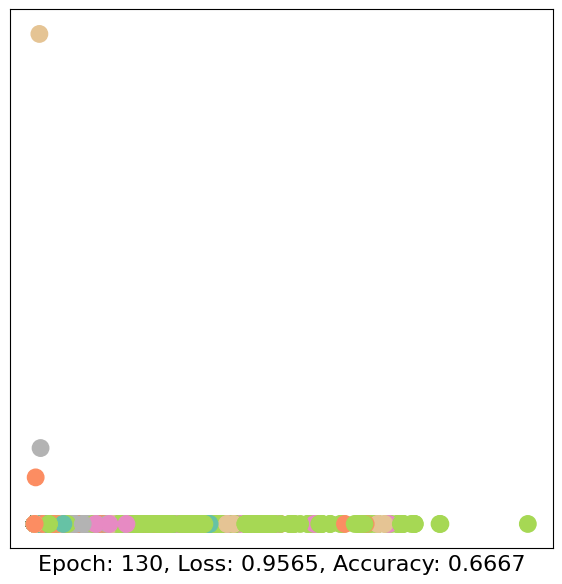

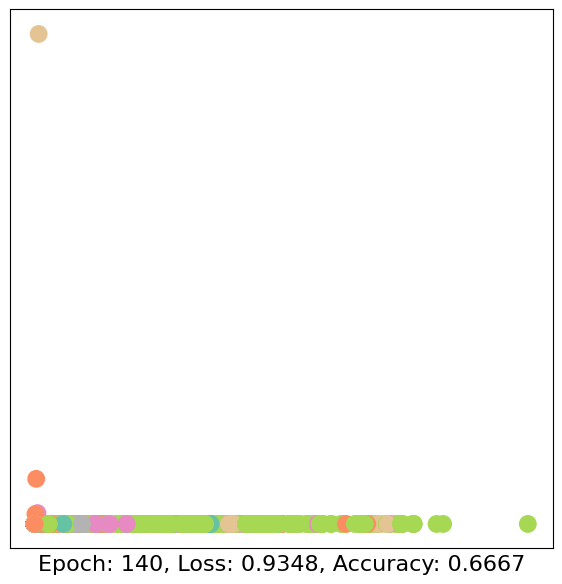

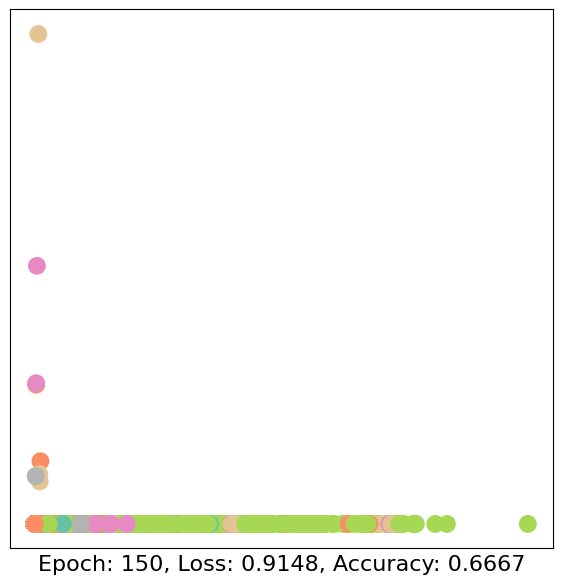

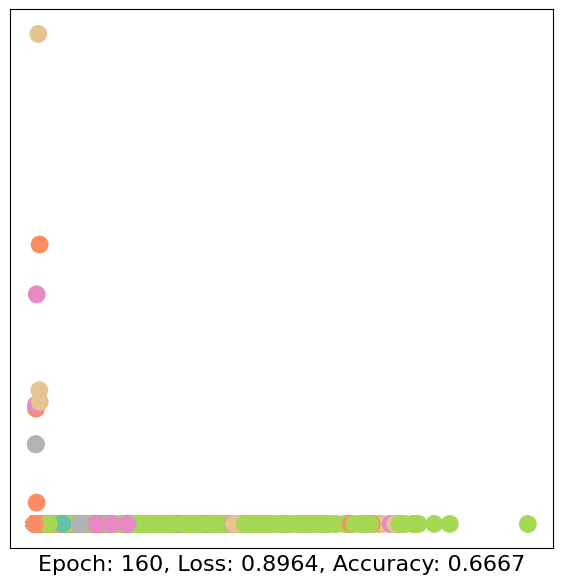

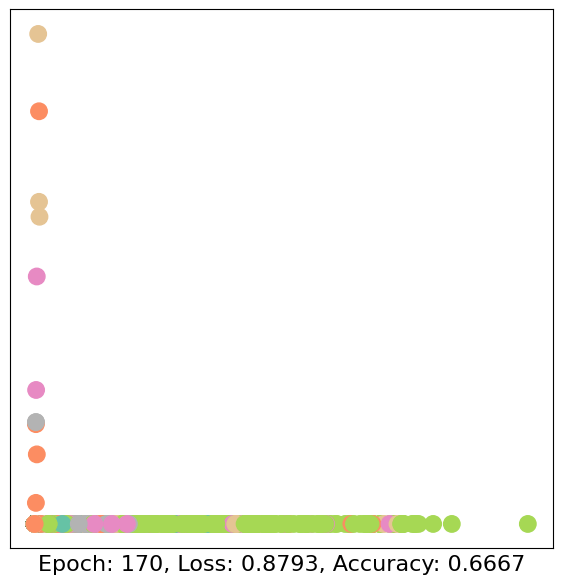

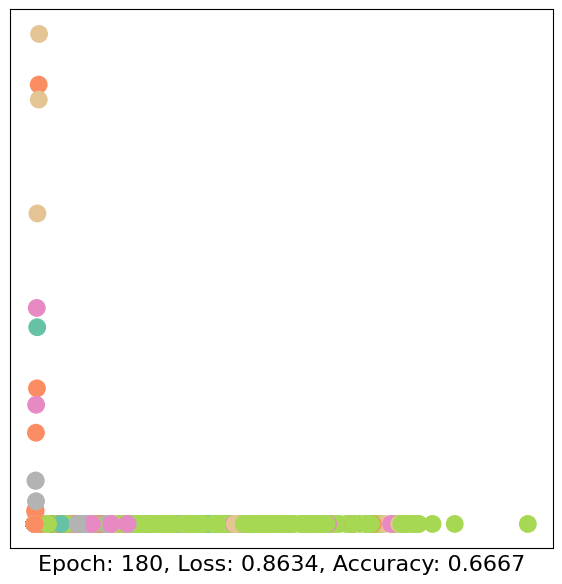

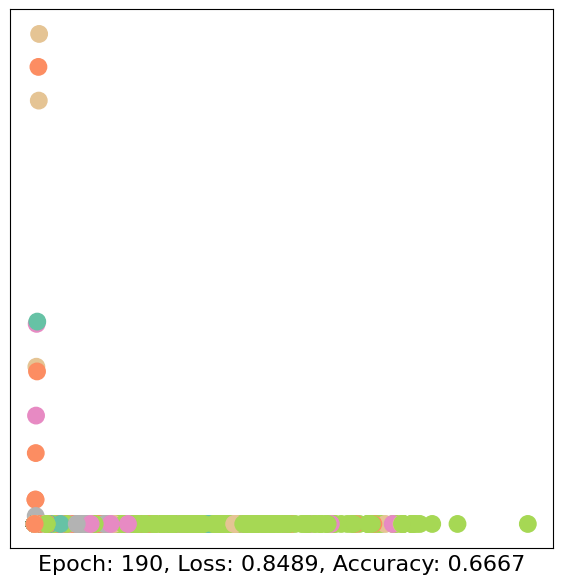

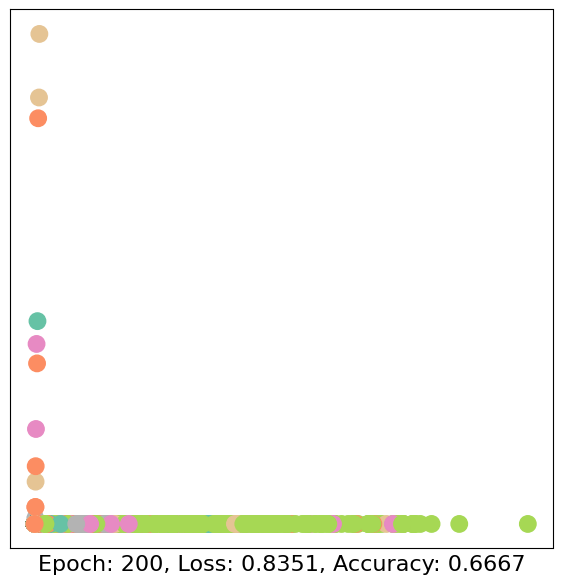

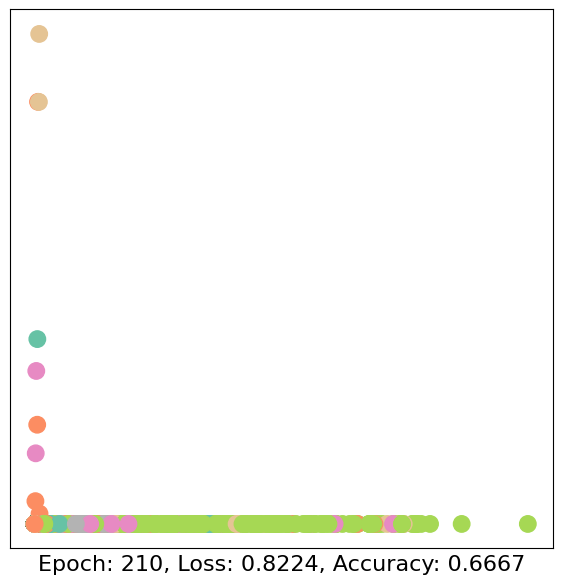

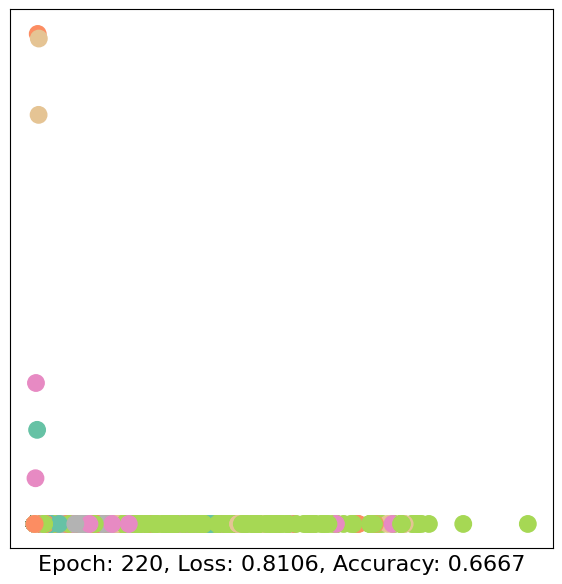

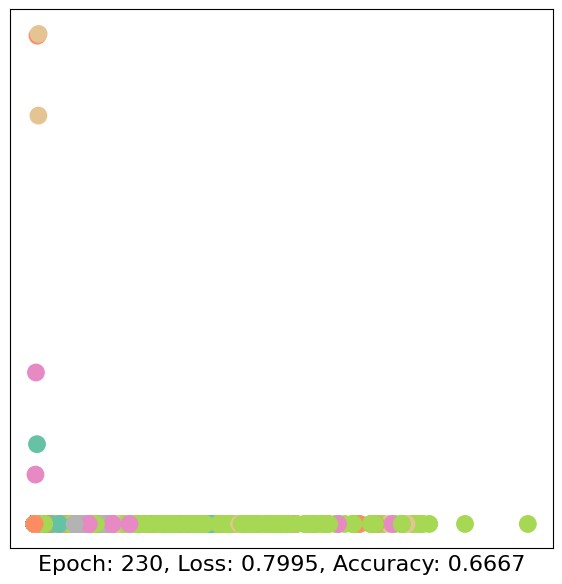

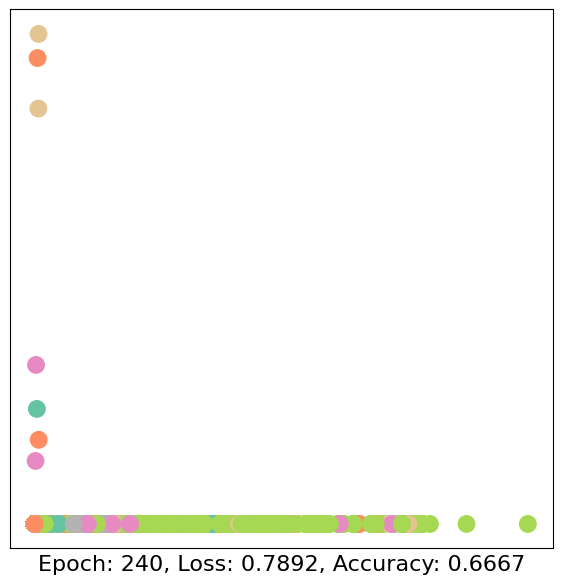

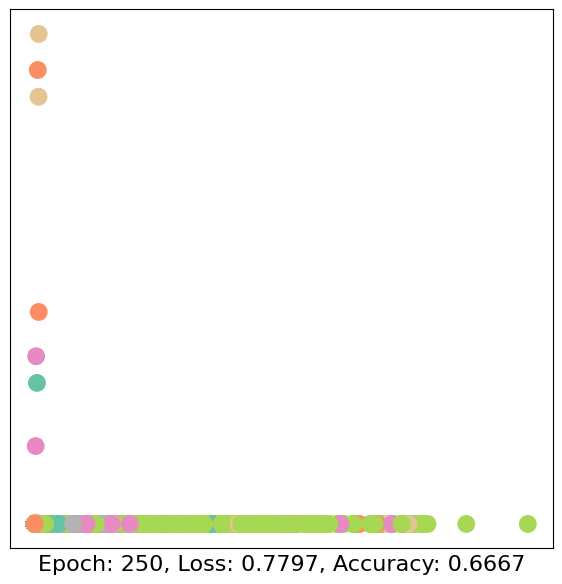

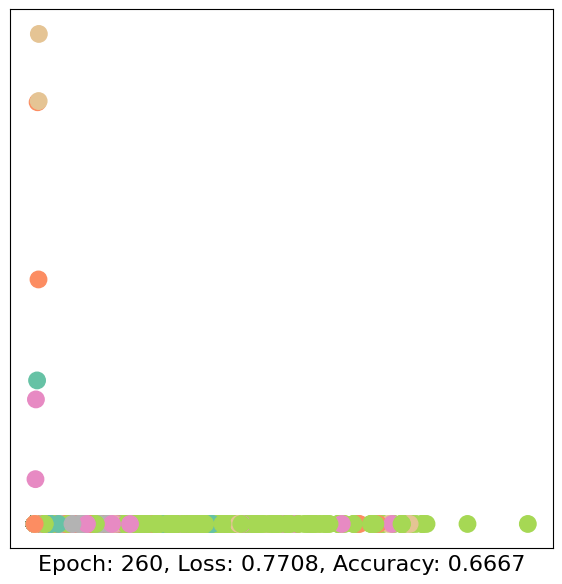

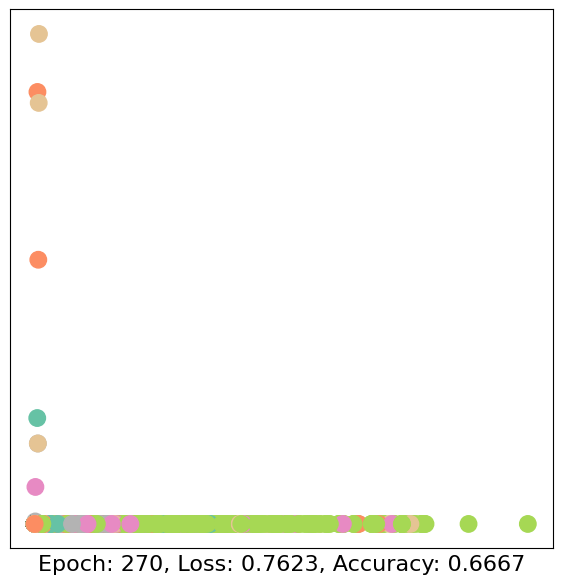

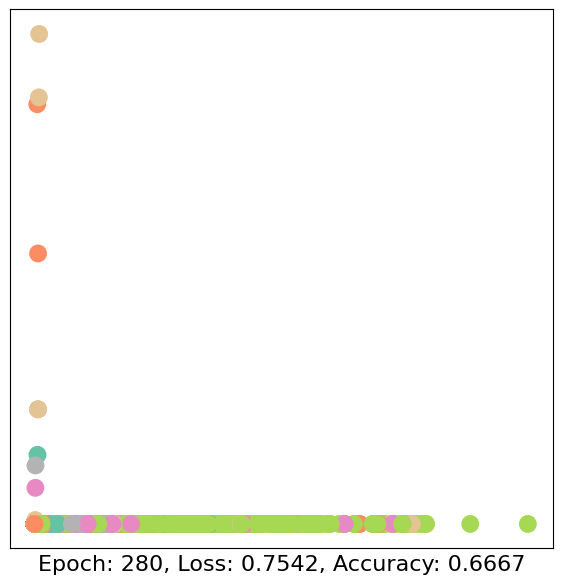

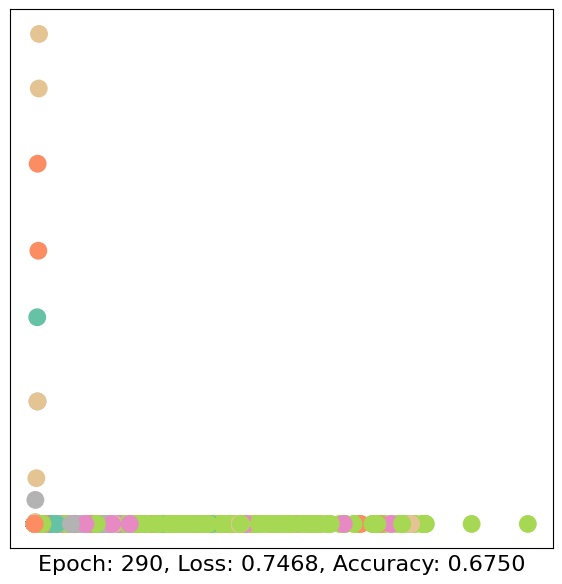

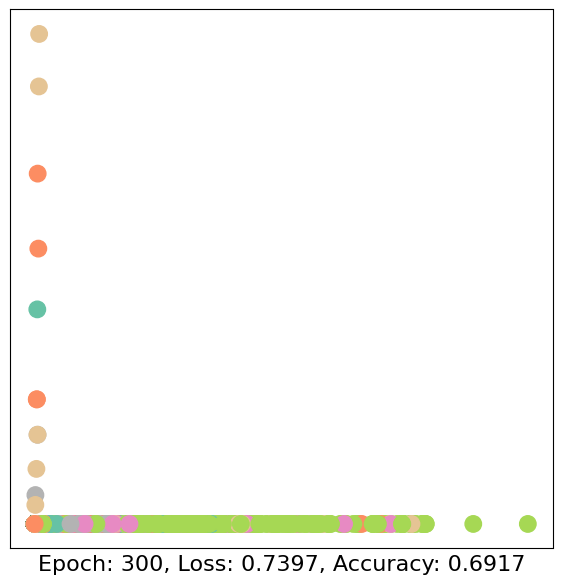

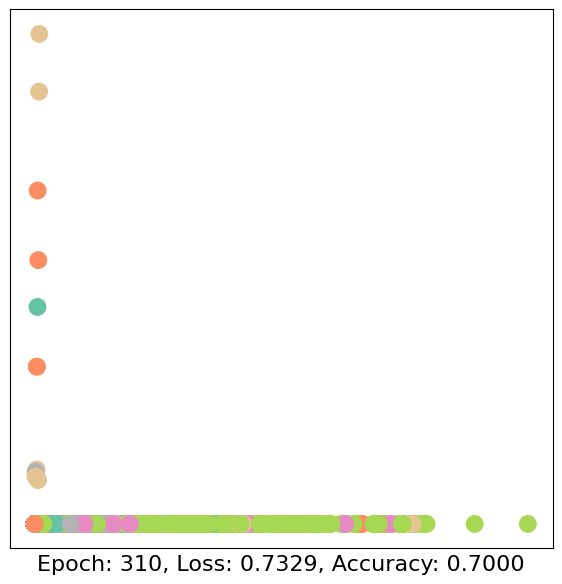

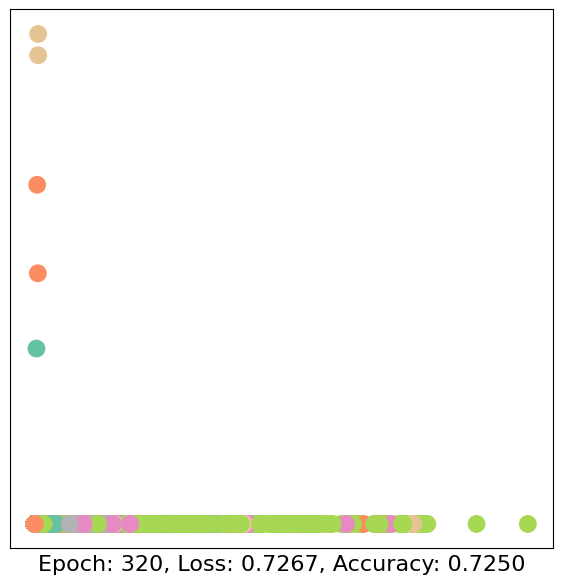

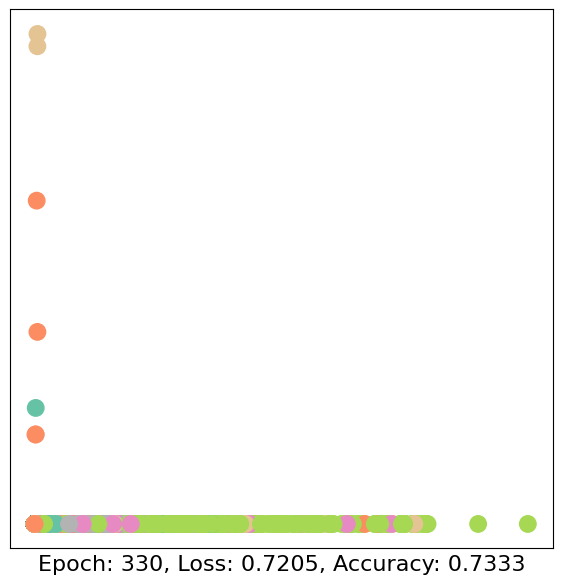

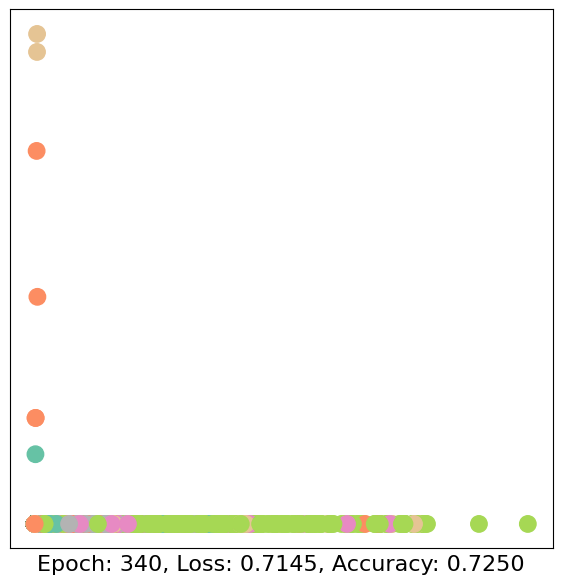

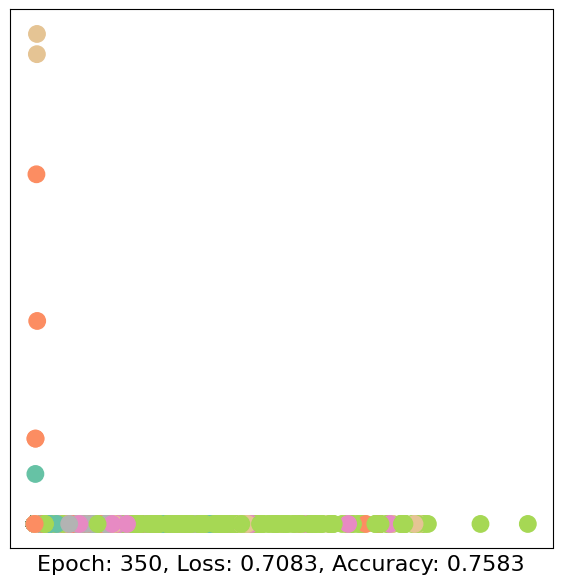

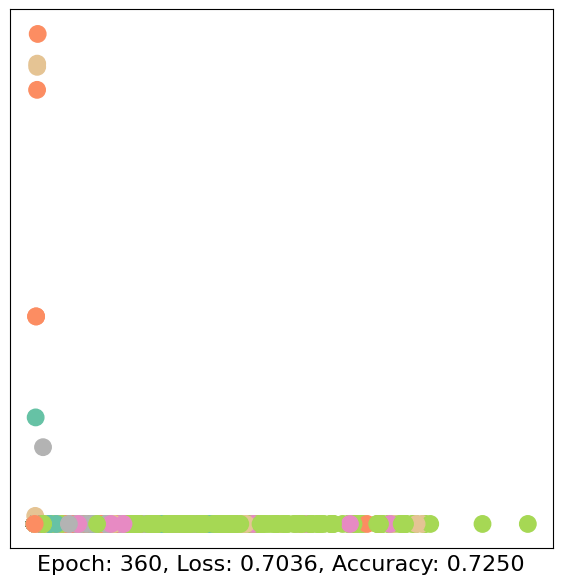

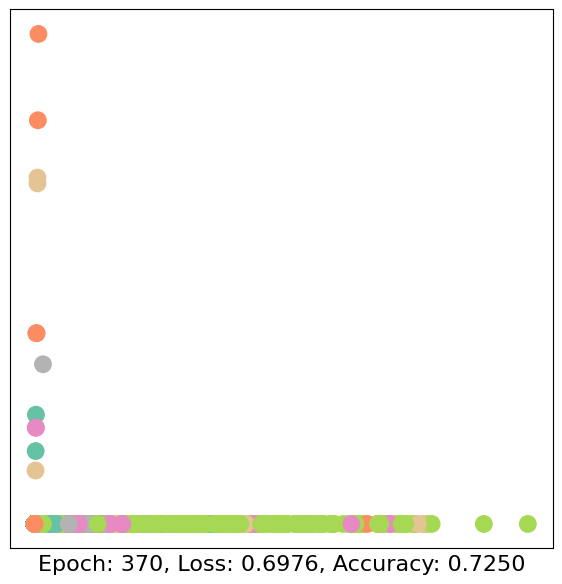

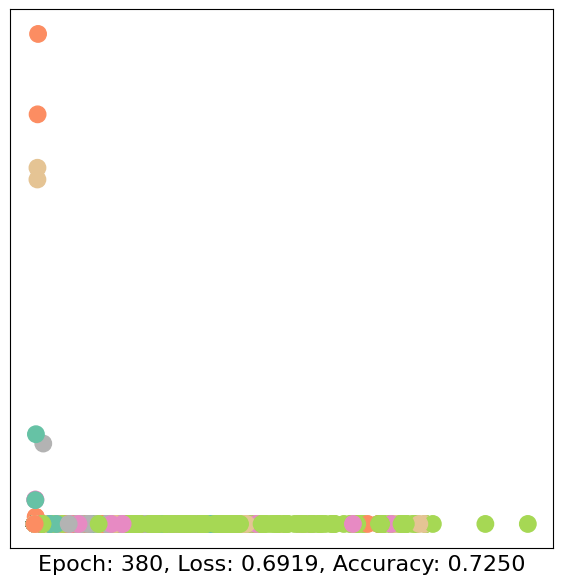

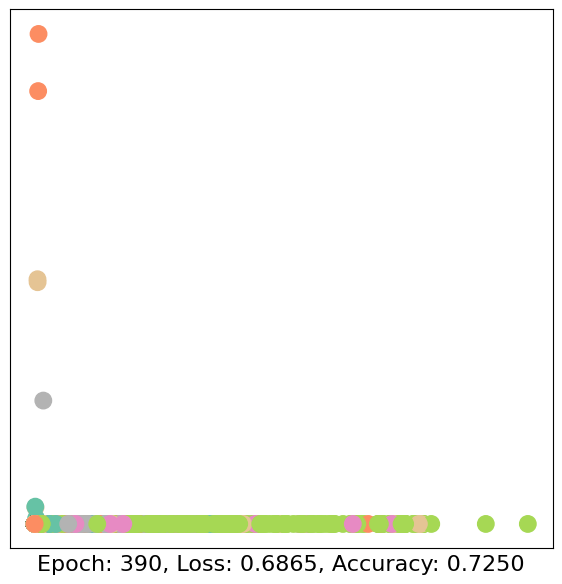

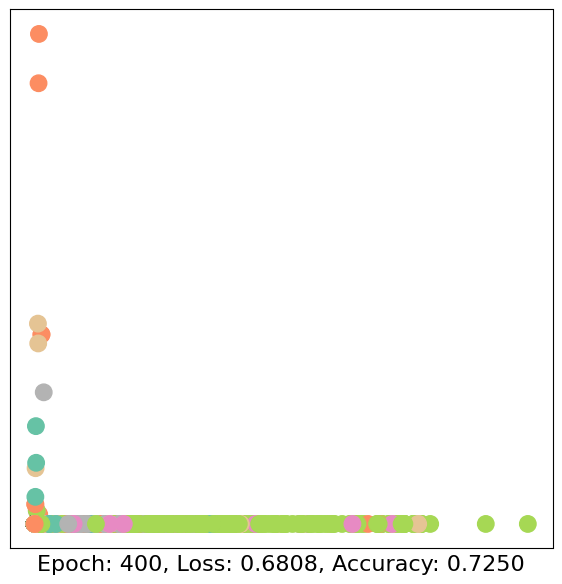

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

@torch.no_grad()
def test(data):
    model.eval()
    log_probs, h = model(data.x, data.edge_index)
    accs = []
    for _, mask in data('train_mask', 'test_mask'):
        pred = log_probs[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs

for epoch in range(401):
    loss, h = train(data)
    accs = test(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss, accs=accs)
        time.sleep(0.3)

### PubMed

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root="", name="PubMed")
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...


Dataset: PubMed():
Number of graphs: 1
Number of features: 500
Number of classes: 3


Done!


In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])
Number of nodes: 19717
Number of edges: 88648
Average node degree: 4.50
Number of training nodes: 60
Training node label rate: 0.00
Has isolated nodes: False
Has self-loops: False
Is undirected: True


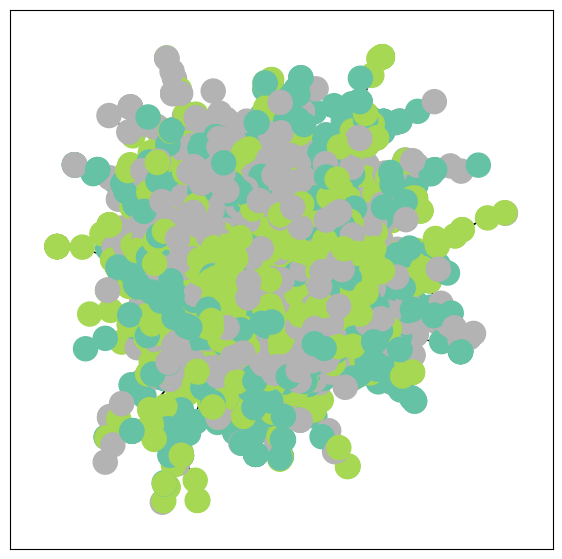

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(500, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=3, bias=True)
)


Embedding shape: [19717, 2]


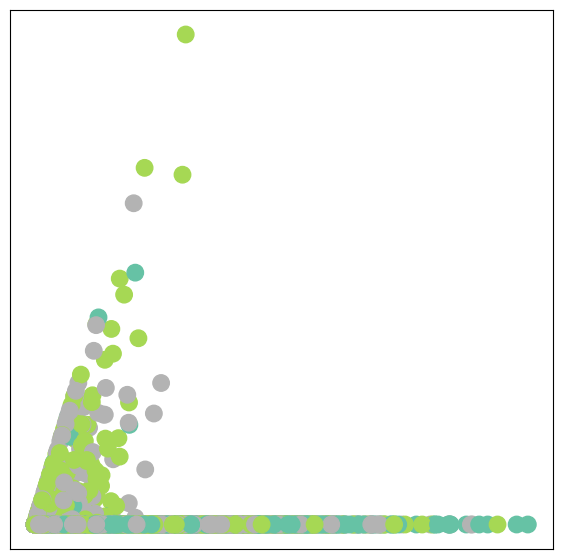

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

<IPython.core.display.Javascript object>

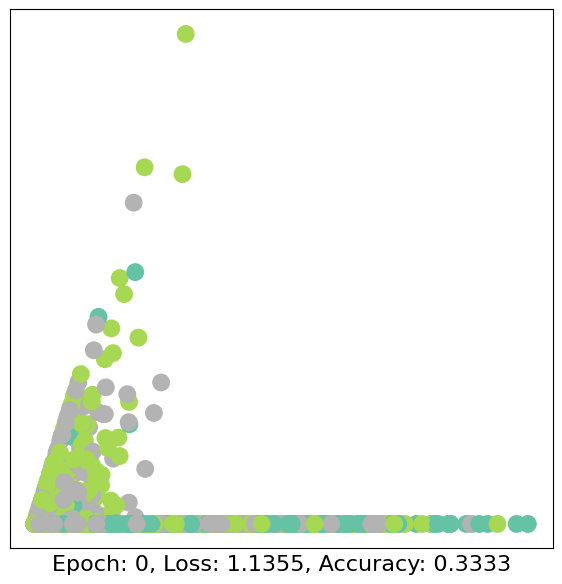

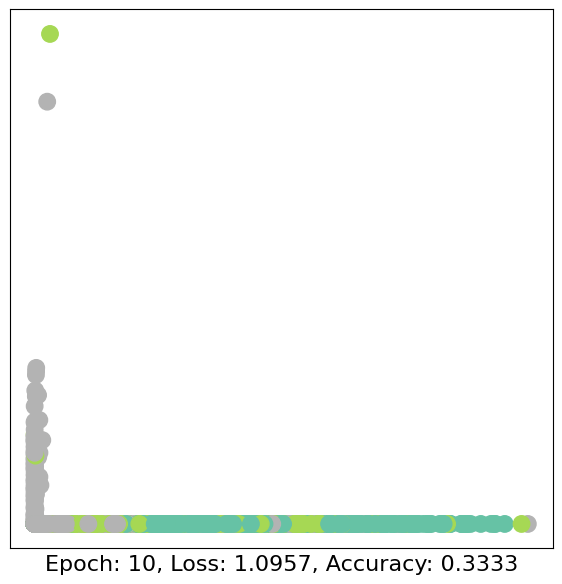

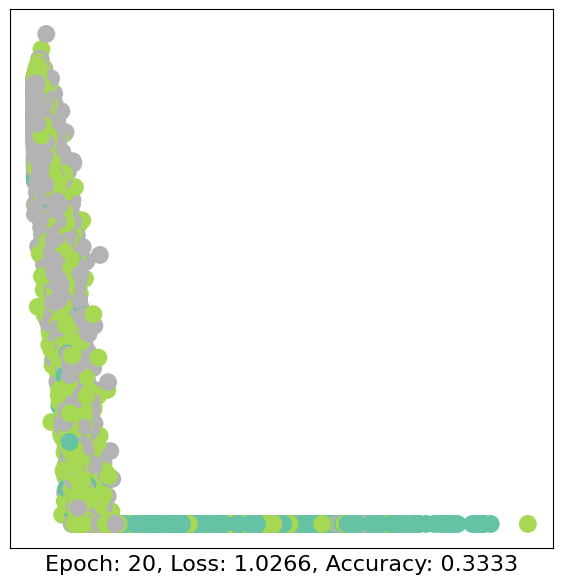

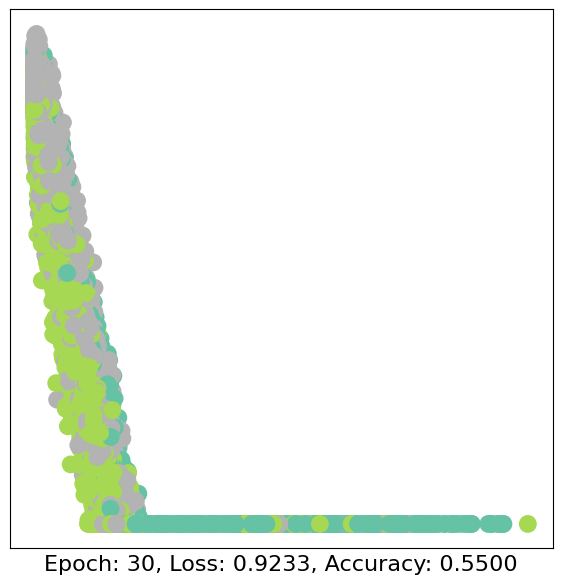

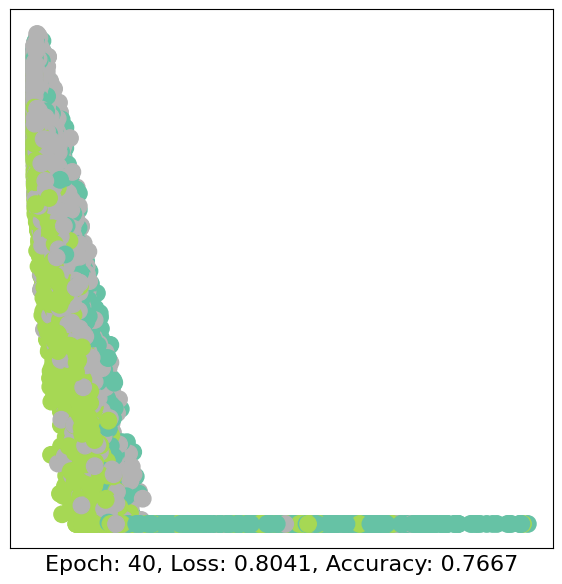

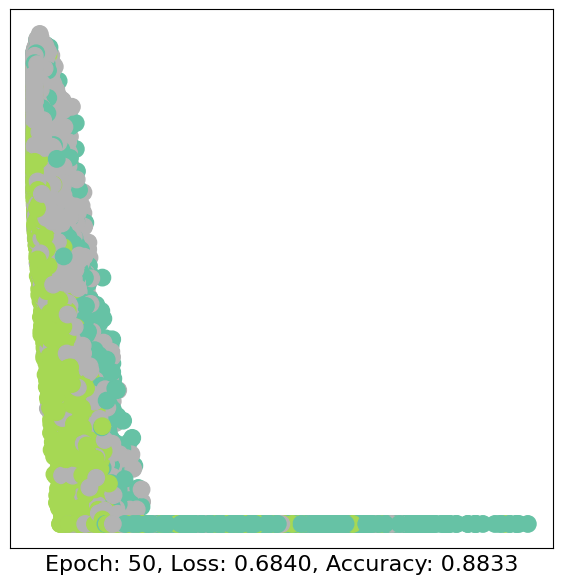

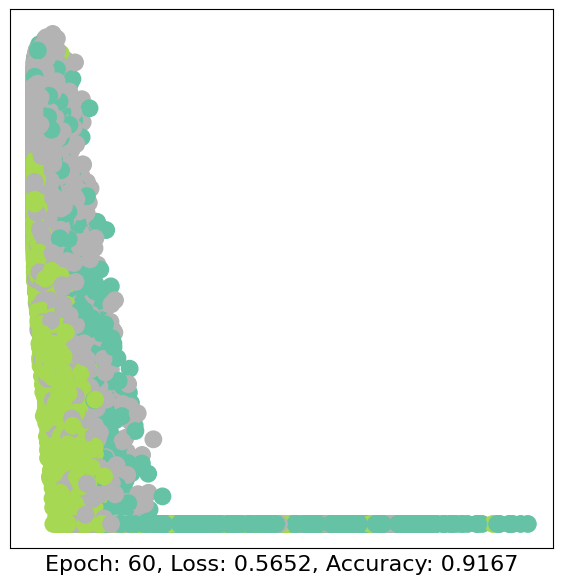

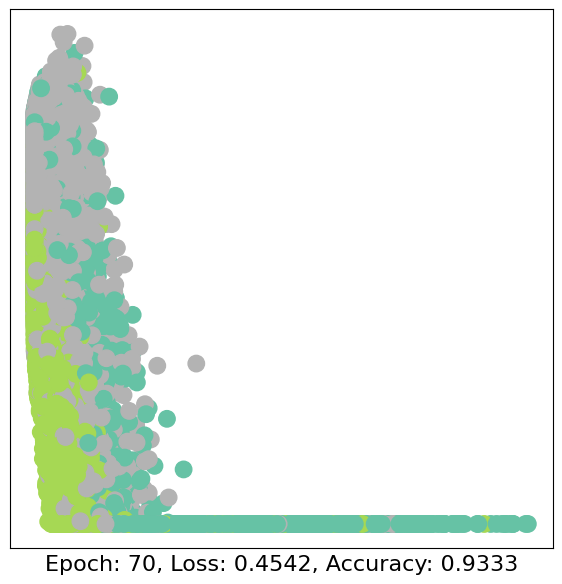

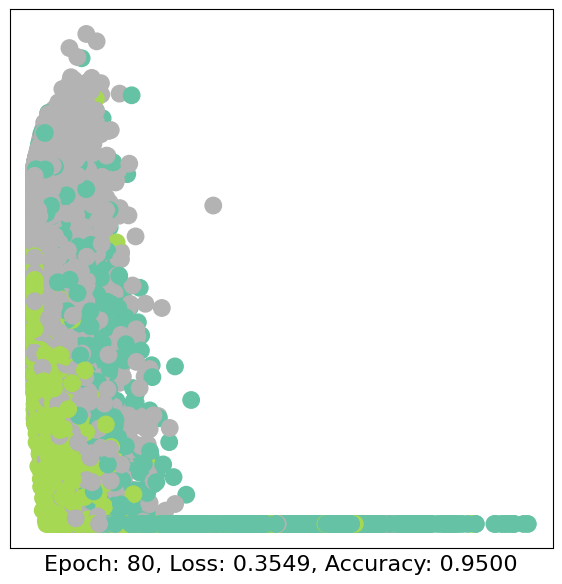

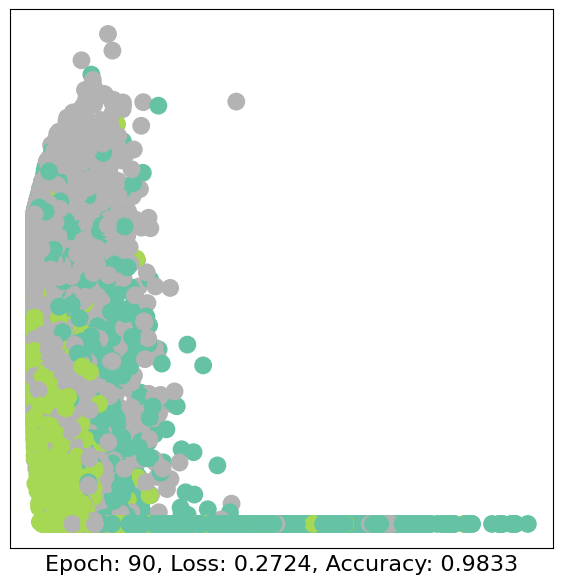

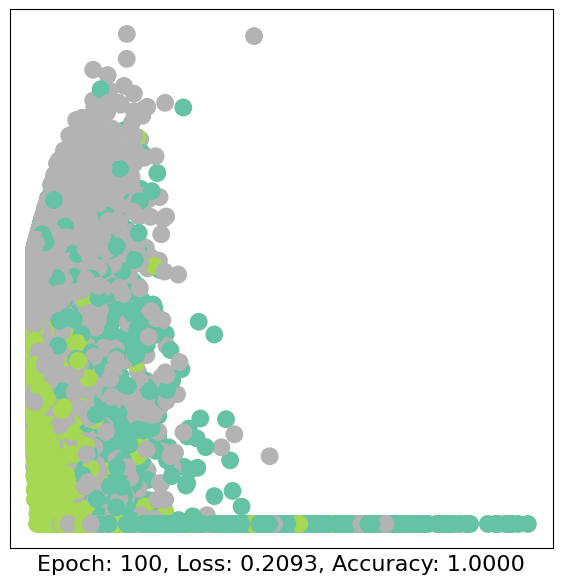

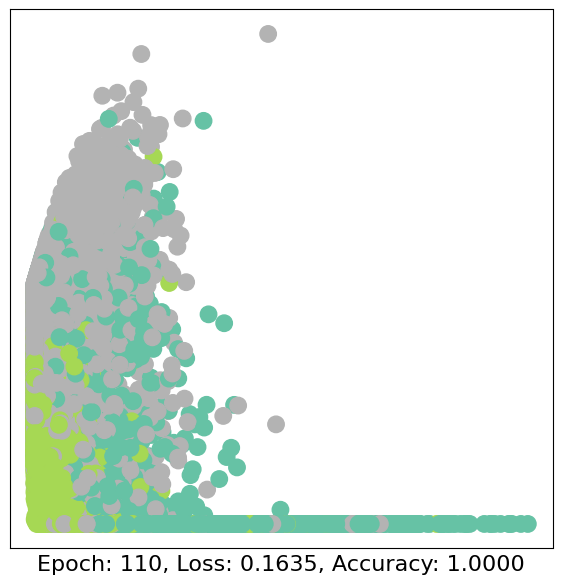

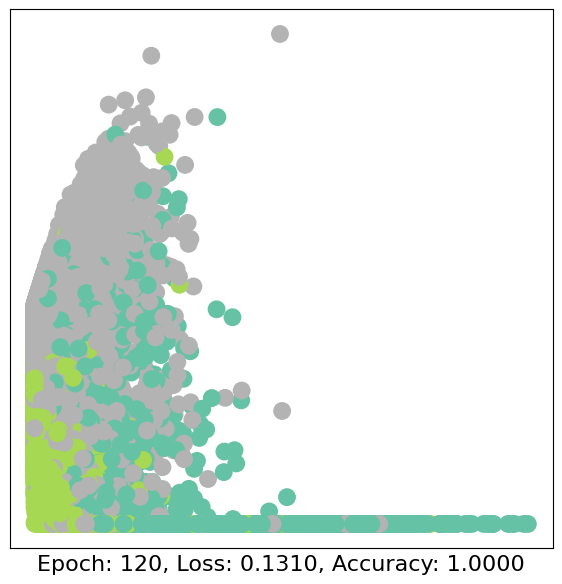

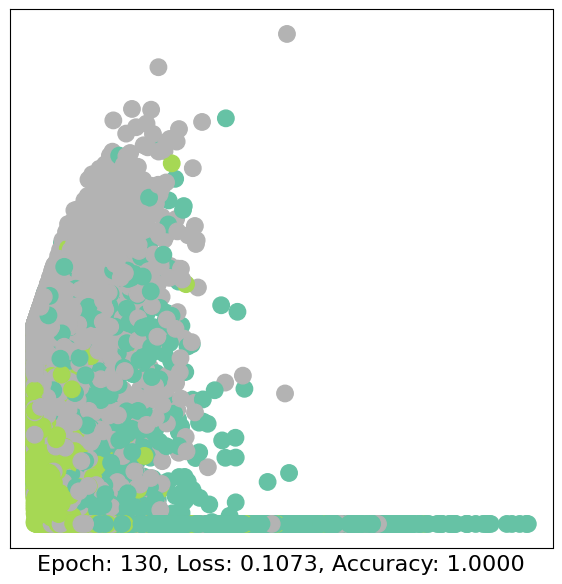

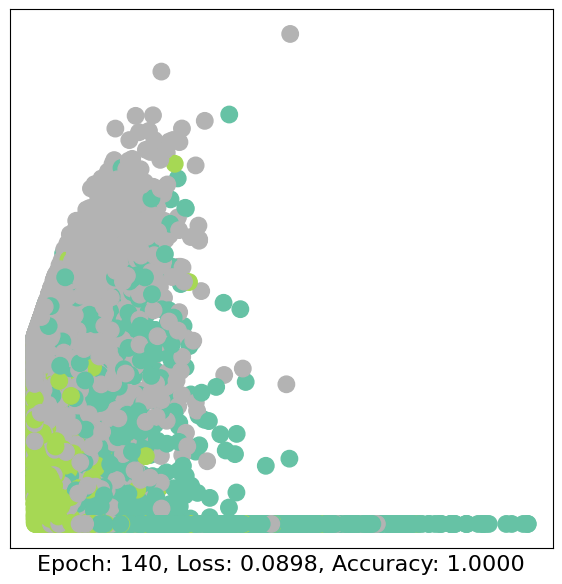

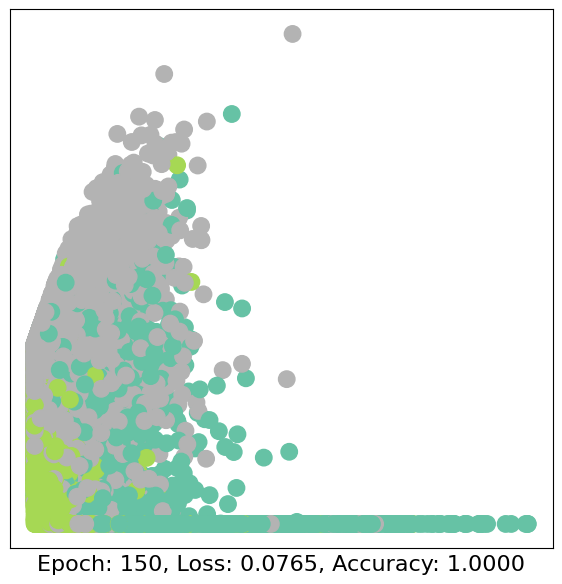

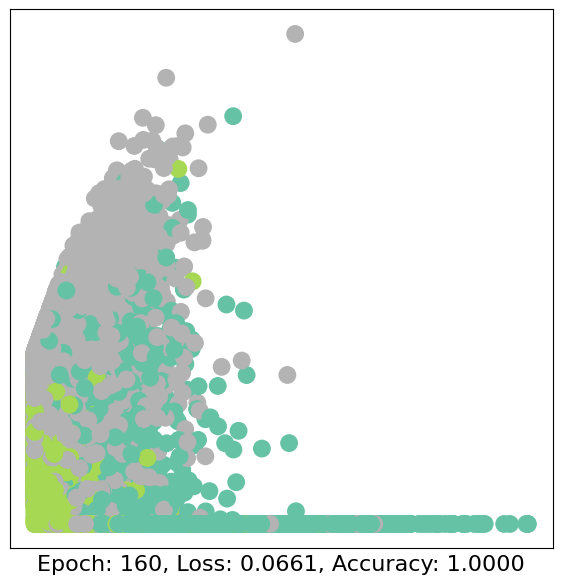

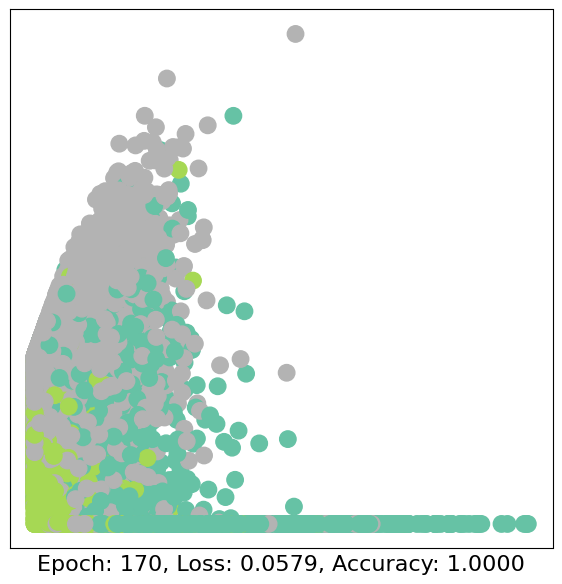

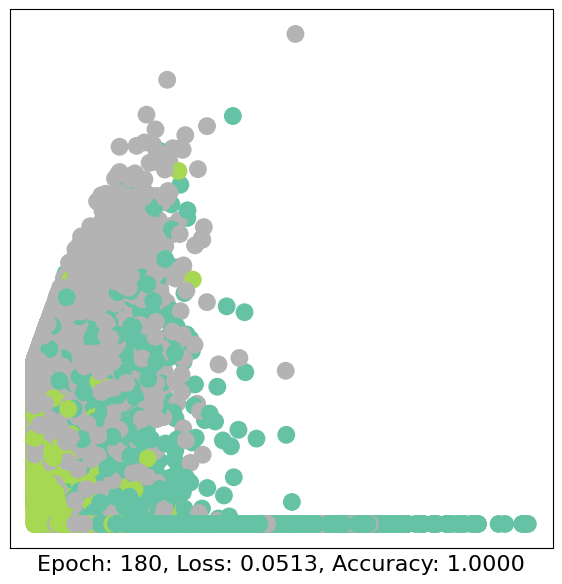

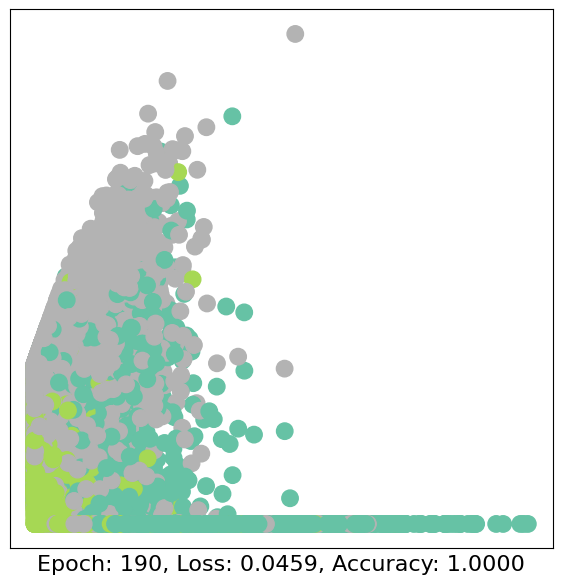

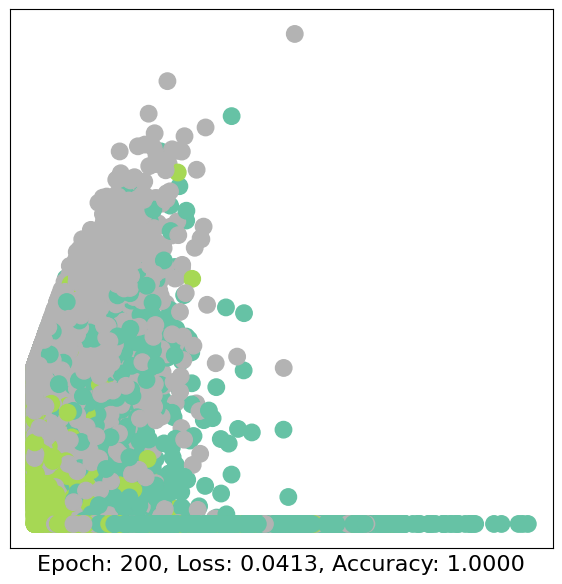

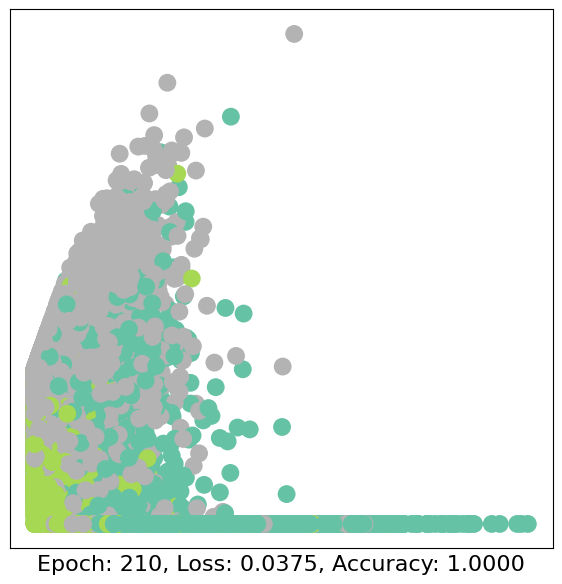

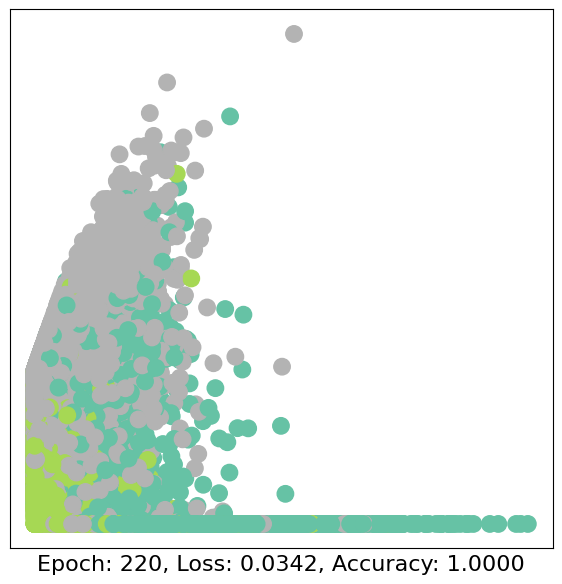

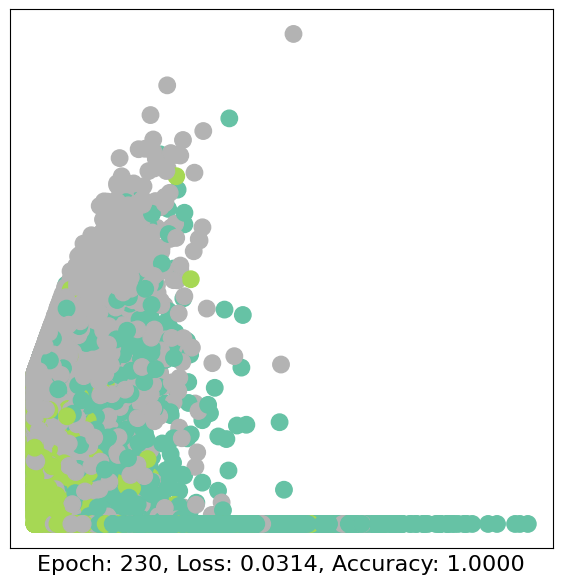

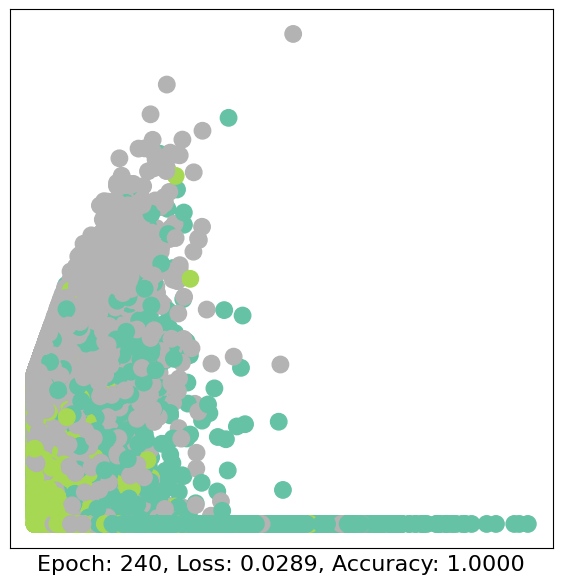

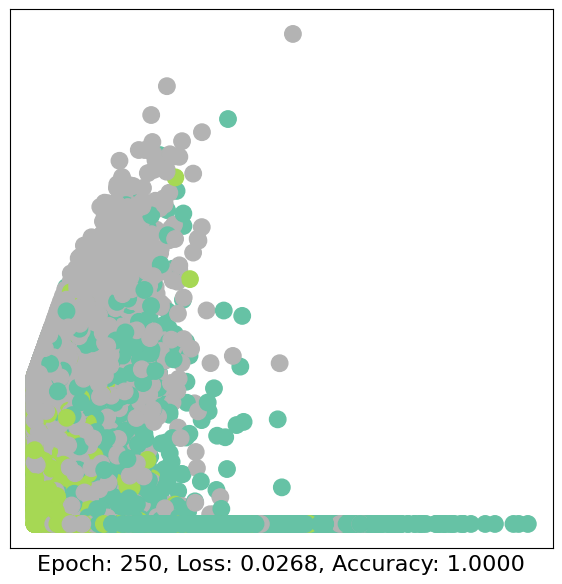

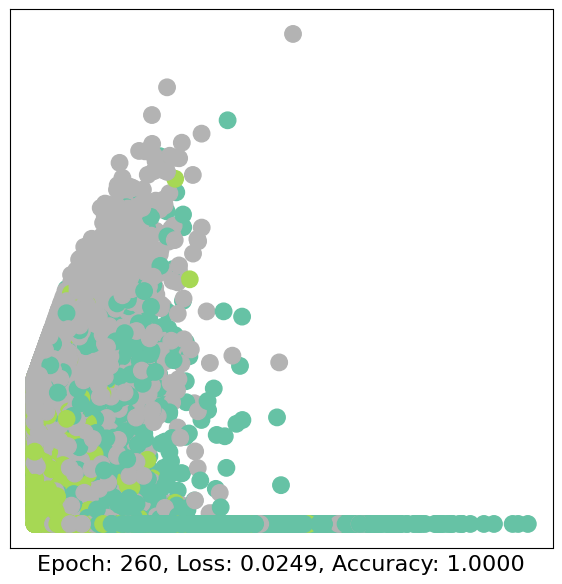

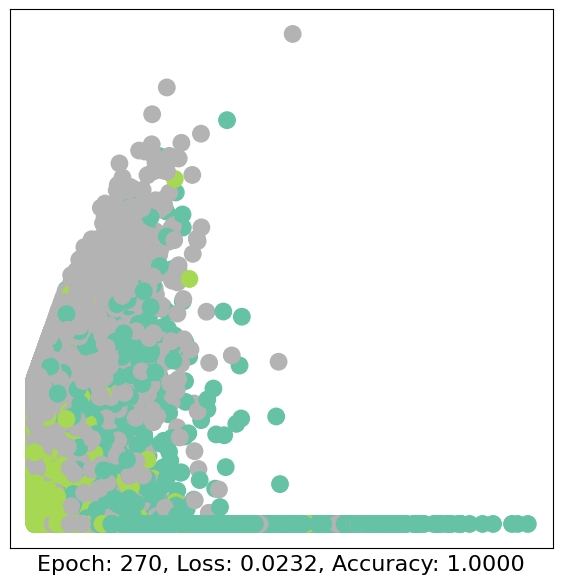

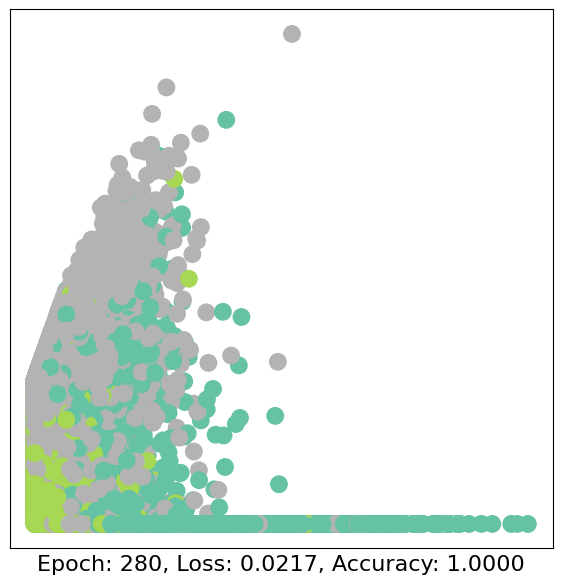

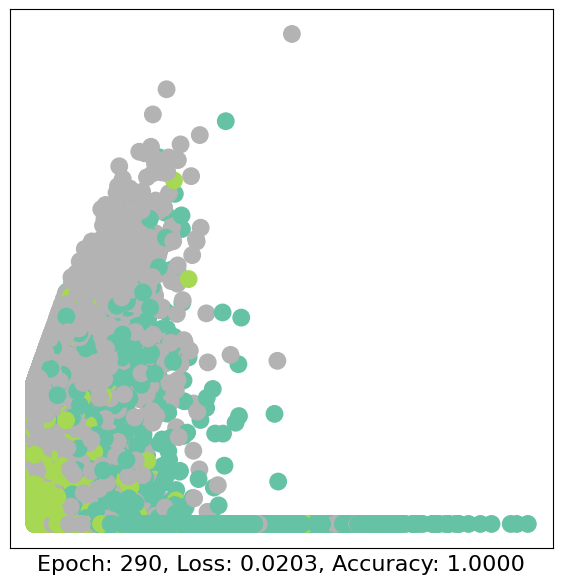

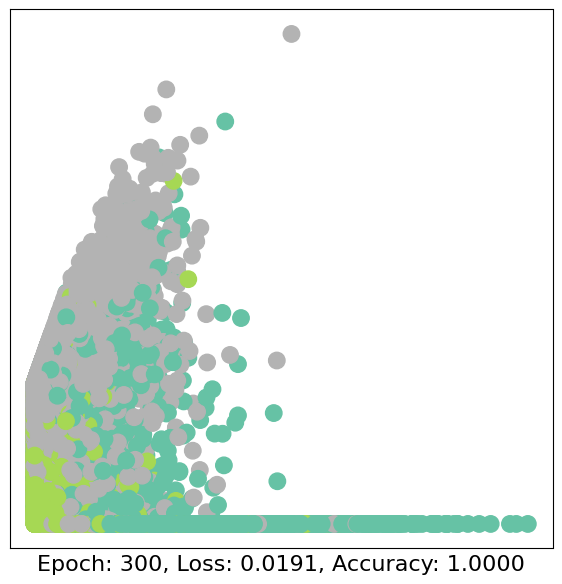

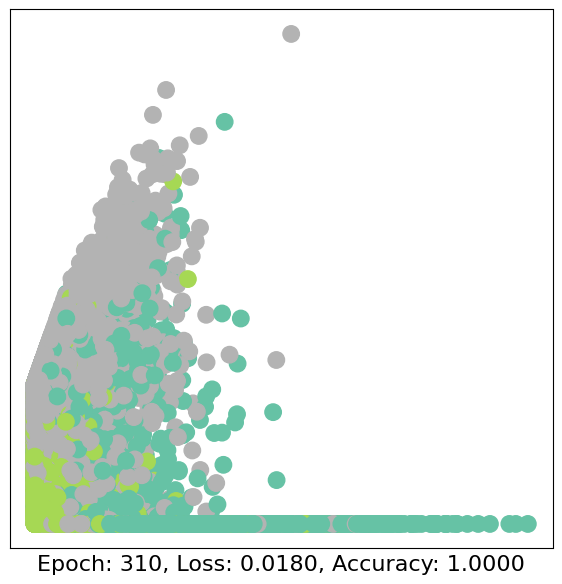

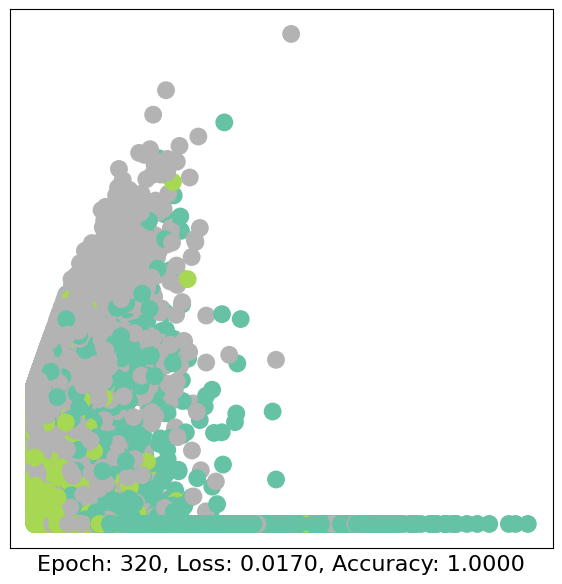

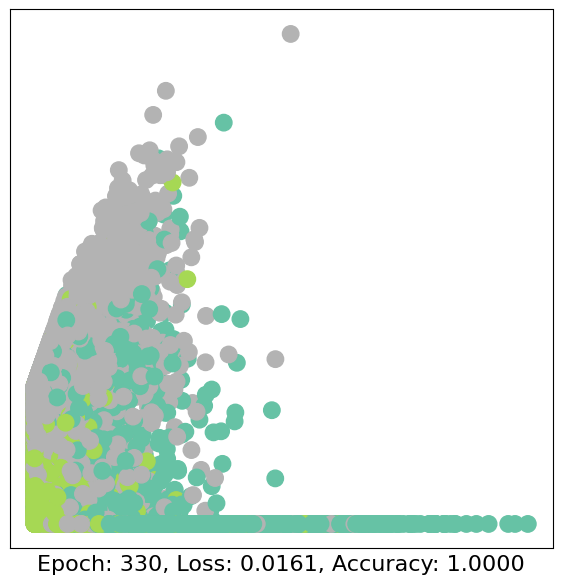

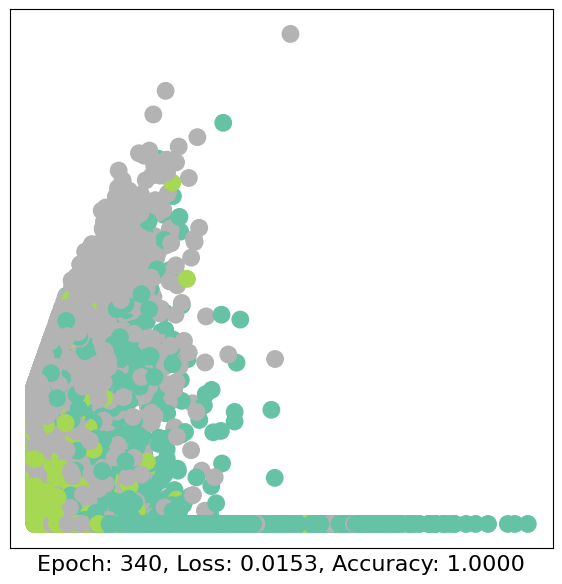

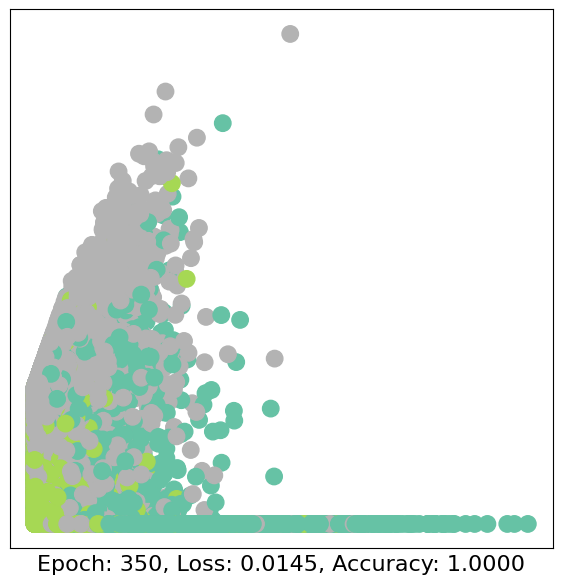

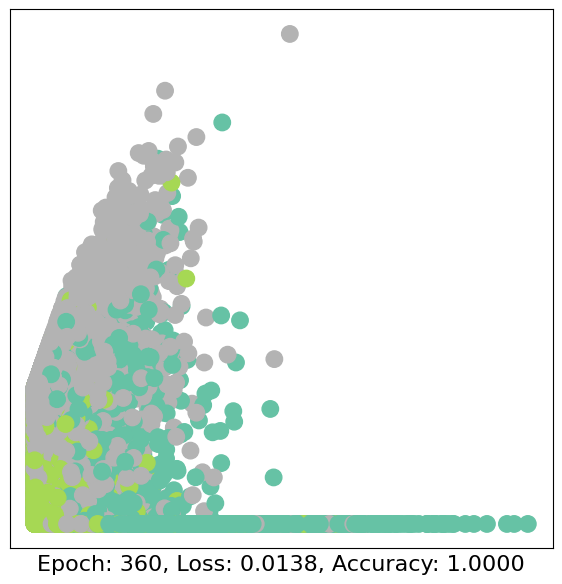

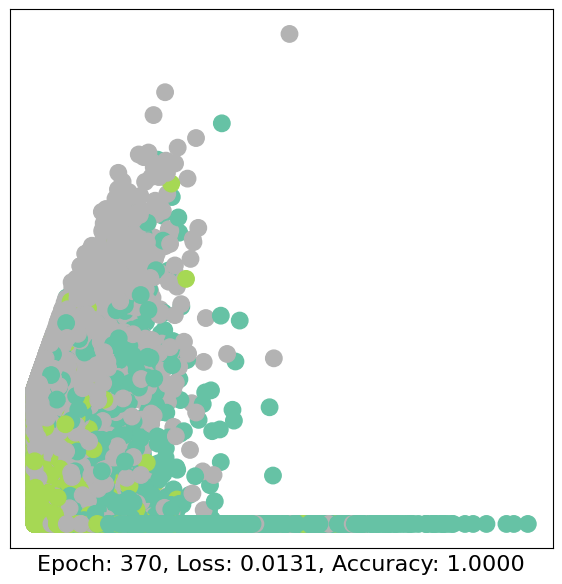

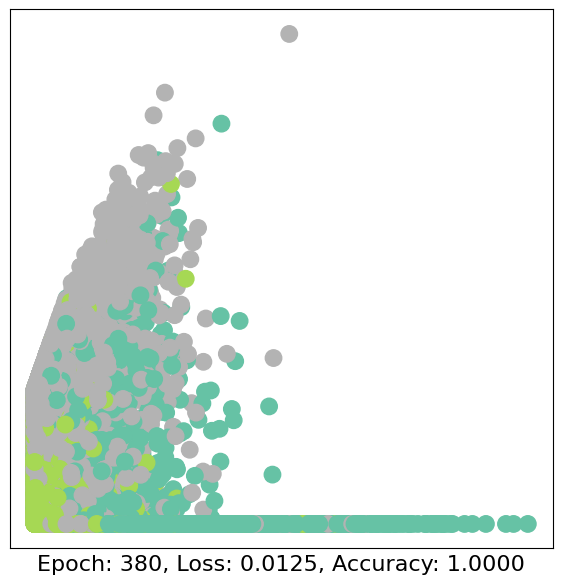

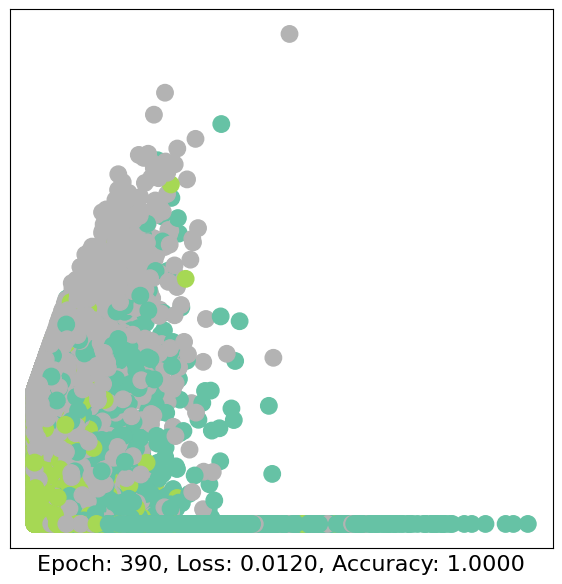

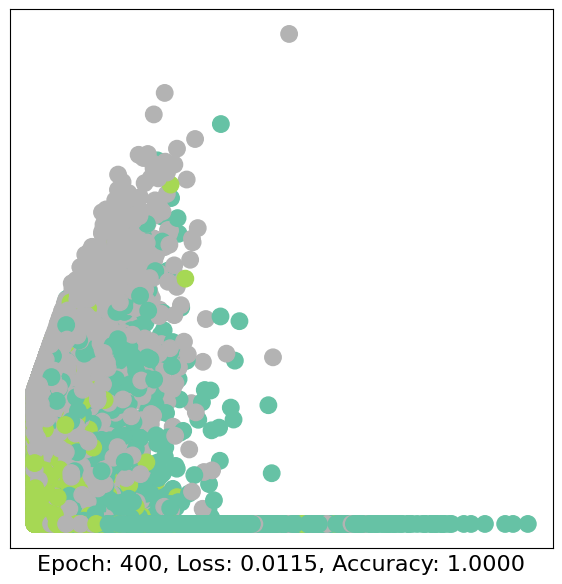

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

@torch.no_grad()
def test(data):
    model.eval()
    log_probs, h = model(data.x, data.edge_index)
    accs = []
    for _, mask in data('train_mask', 'test_mask'):
        pred = log_probs[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs

for epoch in range(401):
    loss, h = train(data)
    accs = test(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss, accs=accs)
        time.sleep(0.3)

### Training/Testing Results and Conclusions

The following table contains the final computed loss and accuracy of our simple GCN model using each of the four datasets. Also included in the table is the number of nodes and classes of each dataset.

| Dataset   | Training Loss   | Testing Accuracy  | # of Nodes | # of Classes |
|---|---|---|---|---|
| Karate Club  | 0.3506  | 0.7500  | 34 | 4 |
| Cora  | 0.9480  | 0.5714  | 10556 | 7 |
| CiteSeer  | 0.6808  | 0.7250  | 9014 | 6 |
| PubMed  | 0.0115  | 1.0000  | 88648 | 3 |

Based on these results, it is clear that our model had the best results with the PubMed and Karate Club datasets. But why?

When looking at the number of classes each dataset has, the ones with a lower amount correlate with the ones that had a lower training loss and higher testing accuracy. Furthermore, the number of nodes doesn't seem to have as much of an affect on the loss as the number of classes does with this model, since PubMed and Karate Club have the lowest loss, but have the highest and lowest amount of nodes respectively.

It is also important to note that the model itself likely has a large impact on the training and testing effectiveness. Changing the number of GCN layers, the activation functions, and more would definitely affect the results. For example, another GCN layer would mean another hop in label propagation. This *could* be helpful for larger graphs, but detrimental for smaller graphs since all of the nodes would start to look the same.

In conclusion, both the number of classes and the actual structure of the graph data, and the way we build our model affect the effectiveness of said model in node classification problems.

## References

1. Bourke, D. (2021, December 9). *Zero to Mastery Learn PyTorch for Deep Learning*. https://www.learnpytorch.io/

2. Hamilton, W. L. (2020). *Graph Representation Learning.*

3. Veličković, P. (2023). *Everything is connected: Graph neural networks.* Current Opinion in Structural Biology, 79, 102538. URL https://arxiv.org/abs/2301.08210

4. WelcomeAIOverlords. (2020, March 13). *Intro to Graphs and Label Propagation Algorithm in Machine Learning* [Video]. YouTube. https://youtu.be/OI0Jo-5d190

5. WelcomeAIOverlords. (2020, May 18). *Graph Convolutional Networks (GCNs) made simple* [Video]. YouTube. https://youtu.be/2KRAOZIULzw